# 1 - Extraction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
from scipy import stats
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
import csv

In [ ]:
#connects to google drive where we save the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


this code is used to convert the csv dataset to parquet format

In [ ]:
#uncomment all below

# path ='/content/drive/MyDrive/DE course/1990_Accidents_UK.csv'
# index_col = "accident_index"
# df = pd.read_csv(path)
# df = df.astype(str)
# df.to_parquet('1990_Accidents_UK.parquet.gzip',
#               compression='gzip')  
# data = pd.read_parquet('1990_Accidents_UK.parquet.gzip') 

In [ ]:
# IMPORTANT: change the path to where you have the dataset in your own drive

# path = '/content/drive/MyDrive/1990_Accidents_UK.csv' #ali probably
path ='/content/drive/MyDrive/DE course/1990_Accidents_UK.csv' #kewi
# path = '/content/drive/MyDrive/DE course/1990_Accidents_UK.parquet.gzip' #kewi

data = pd.read_csv(path)
# data = pd.read_parquet(path, engine='pyarrow')

index_col = "accident_index"
data = data.set_index('accident_index')
# data = data.replace('nan', np.nan)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


some functions

In [ ]:
def get_percentage(data):
  display(data.isnull().sum()/len(data)*100)

# 2- EDA

## General exploring

In [ ]:
data.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,1990,01AB00002,527110.0,180180.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199001AB00004,1990,01AB00004,529520.0,179270.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199001AB00005,1990,01AB00005,529590.0,178290.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199001AB00006,1990,01AB00006,529960.0,178290.0,NaN,NaN,Metropolitan Police,Slight,3,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199001AB00007,1990,01AB00007,529020.0,179130.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1


In [ ]:
data.shape

(258441, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258441 entries, 199001AB00002 to 1990986016890
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                258441 non-null  int64  
 1   accident_reference                           258441 non-null  object 
 2   location_easting_osgr                        258316 non-null  float64
 3   location_northing_osgr                       258316 non-null  float64
 4   longitude                                    0 non-null       float64
 5   latitude                                     0 non-null       float64
 6   police_force                                 258441 non-null  object 
 7   accident_severity                            258441 non-null  object 
 8   number_of_vehicles                           258441 non-null  int64  
 9   number_of_casualties                         

In [ ]:
"""
percentage of rows that are nulls

we can notice here that the empty columns are:
  longitude
  latitude

a huge chunk of data is missing from:
  second_road_number

less than 1% percent of the data is missing from:
  location_easting_osgr
  location_northing_osgr
  date
  time
  first_road_number
  road_type
  weather_conditions
"""

get_percentage(data)

accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.048367
location_northing_osgr                           0.048367
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.001161
day_of_week                                      0.000000
time                                             0.001161
local_authority_district                         0.000000
local_authority_ons_district                     0.000000
local_authority_highway                          0.000000
first_road_class                                 0.000000
first_road_num

In [ ]:
"""
single value columns (std =0 in numerical cols or unique =1 in non-numerical cols) are:
  accident_year = 1990 (dropped)
  longitude = NaN (dropped)
  latitude = NaN (dropped)
  local_authority_ons_district = -1 (dropped)
  local_authority_highway = -1 (dropped)
  lsoa_of_accident_location = -1 (dropped)
  urban_or_rural_area = Data missing or out of range (dropped)
  did_police_officer_attend_scene_of_accident = Data missing or out of range (dropped)
  trunk_road_flag = Data missing or out of range (dropped)

columns with no duplicates (unique = number of rows in non-numerical cols) are:
  accident_index
  accident_reference

columns where there's a possibility for outliers (max is far away from the 75% quartile in numerical cols) are:
  number_of_vehicles
  number_of_casualties
  speed_limit
"""
data.describe(include = np.number)

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,local_authority_ons_district,local_authority_highway,speed_limit,lsoa_of_accident_location
count,258441.0,258316.000000,258316.000000,0.0,0.0,258441.000000,258441.000000,258441.0,258441.0,258441.000000,258441.0
mean,1990.0,439014.797109,304099.577881,NaN,NaN,1.761462,1.319996,-1.0,-1.0,38.979516,-1.0
std,0.0,96316.777489,163819.306068,NaN,NaN,0.736475,0.823276,0.0,0.0,14.143557,0.0
min,1990.0,29900.000000,10.000000,NaN,NaN,1.000000,1.000000,-1.0,-1.0,0.000000,-1.0
25%,1990.0,374500.000000,179320.000000,NaN,NaN,1.000000,1.000000,-1.0,-1.0,30.000000,-1.0
50%,1990.0,440905.000000,268800.000000,NaN,NaN,2.000000,1.000000,-1.0,-1.0,30.000000,-1.0
75%,1990.0,523990.000000,399072.500000,NaN,NaN,2.000000,1.000000,-1.0,-1.0,50.000000,-1.0
max,1990.0,947300.000000,999000.000000,NaN,NaN,33.000000,51.000000,-1.0,-1.0,660.000000,-1.0


In [ ]:
data.describe(include = np.object).iloc[:,:len(data.columns)//2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,accident_reference,police_force,accident_severity,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions
count,258441,258441,258441,258438,258441,258438,258441,258441,258427,257463,258441,258441,258441,155228,258441,258441,258441
unique,258441,51,3,365,7,1437,461,7,3492,5,10,5,7,2902,4,7,6
top,01AB00002,Metropolitan Police,Slight,21/12/1990,Friday,17:00,Birmingham,A,first_road_class is C or Unclassified. These r...,Single carriageway,Not at junction or within 20 metres,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight
freq,1,46270,202749,1101,43700,2657,4046,121652,96946,204862,102467,131901,112732,125403,256823,223506,185614


In [ ]:
data.describe(include = np.object).iloc[:,:len(data.columns)//2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,accident_reference,police_force,accident_severity,date,day_of_week,time,local_authority_district,first_road_class,first_road_number,road_type,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions
count,258441,258441,258441,258438,258441,258438,258441,258441,258427,257463,258441,258441,258441,155228,258441,258441,258441
unique,258441,51,3,365,7,1437,461,7,3492,5,10,5,7,2902,4,7,6
top,01AB00002,Metropolitan Police,Slight,21/12/1990,Friday,17:00,Birmingham,A,first_road_class is C or Unclassified. These r...,Single carriageway,Not at junction or within 20 metres,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight
freq,1,46270,202749,1101,43700,2657,4046,121652,96946,204862,102467,131901,112732,125403,256823,223506,185614


In [ ]:
print(data.apply(lambda col: col.unique()))

accident_year                                                                             [1990]
accident_reference                             [01AB00002, 01AB00004, 01AB00005, 01AB00006, 0...
location_easting_osgr                          [527110.0, 529520.0, 529590.0, 529960.0, 52902...
location_northing_osgr                         [180180.0, 179270.0, 178290.0, 179130.0, 17987...
longitude                                                                                  [nan]
latitude                                                                                   [nan]
police_force                                   [Metropolitan Police, City of London, Cumbria,...
accident_severity                                                       [Slight, Serious, Fatal]
number_of_vehicles                             [2, 3, 1, 4, 5, 7, 6, 8, 9, 18, 29, 11, 12, 15...
number_of_casualties                           [1, 2, 4, 3, 5, 6, 8, 7, 9, 10, 15, 16, 12, 24...
date                          

In [ ]:
data.corr()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,local_authority_ons_district,local_authority_highway,speed_limit,lsoa_of_accident_location
accident_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_easting_osgr,NaN,1.000000,-0.463192,NaN,NaN,0.041423,-0.038429,NaN,NaN,-0.052117,NaN
location_northing_osgr,NaN,-0.463192,1.000000,NaN,NaN,-0.065956,0.031850,NaN,NaN,0.014236,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_vehicles,NaN,0.041423,-0.065956,NaN,NaN,1.000000,0.188618,NaN,NaN,0.116904,NaN
number_of_casualties,NaN,-0.038429,0.031850,NaN,NaN,0.188618,1.000000,NaN,NaN,0.187878,NaN
local_authority_ons_district,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
local_authority_highway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speed_limit,NaN,-0.052117,0.014236,NaN,NaN,0.116904,0.187878,NaN,NaN,1.000000,NaN


## Initial cleaning just to have more meaningful EDA

In [ ]:
columns_to_drop = ["accident_reference","longitude", "latitude", "second_road_number", "accident_year", "local_authority_ons_district", "local_authority_highway", "lsoa_of_accident_location",\
                   "urban_or_rural_area", "did_police_officer_attend_scene_of_accident", "trunk_road_flag"]
df_EDA = data.drop(columns= columns_to_drop, axis=1)
df_EDA = df_EDA.dropna()
df_EDA['accident_severity'] = df_EDA.accident_severity.map({'Slight':0, 'Serious':1, 'Fatal':2})
df_EDA['date'] = pd.to_datetime(df_EDA["date"])
df_EDA.location_easting_osgr = df_EDA.location_easting_osgr.astype(np.float64)
df_EDA.location_northing_osgr = df_EDA.location_northing_osgr.astype(np.float64)
df_EDA.number_of_vehicles = df_EDA.number_of_vehicles.astype(np.float64)
df_EDA.number_of_casualties = df_EDA.number_of_casualties.astype(np.float64)

# df_EDA['day_of_week'] = df_EDA.day_of_week.map({'Sunday':0, 'Monday':1, 'Tuesday':2, "Wednesday":3, "Thursday": 4, "Friday":5, "Saturday":6})

#added feature
df_EDA['month'] = df_EDA['date'].dt.month
df_EDA['Week'] = df_EDA['date'].dt.week
df_EDA['day'] = df_EDA['date'].dt.day
df_EDA['time'] = pd.to_datetime(df_EDA["time"])
df_EDA['hour'] = df_EDA['time'].dt.hour
df_EDA['minute'] = df_EDA['time'].dt.minute

df_EDA.info()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  app.launch_new_instance()


<class 'pandas.core.frame.DataFrame'>
Index: 255988 entries, 199001AB00002 to 1990986016890
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   location_easting_osgr                    255988 non-null  float64       
 1   location_northing_osgr                   255988 non-null  float64       
 2   police_force                             255988 non-null  object        
 3   accident_severity                        255988 non-null  int64         
 4   number_of_vehicles                       255988 non-null  float64       
 5   number_of_casualties                     255988 non-null  float64       
 6   date                                     255988 non-null  datetime64[ns]
 7   day_of_week                              255988 non-null  object        
 8   time                                     255988 non-null  datetime64[ns]
 9   local_author

In [ ]:
df_EDA.shape

(255988, 29)

In [ ]:
df_EDA.head()

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,month,Week,day,hour,minute
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,527110.0,180180.0,Metropolitan Police,0,2.0,1.0,1990-04-01,Thursday,2022-11-26 08:50:00,Westminster,...,Daylight,Fine no high winds,Dry,None,None,4,13,1,8,50
199001AB00004,529520.0,179270.0,Metropolitan Police,0,2.0,1.0,1990-03-01,Wednesday,2022-11-26 13:00:00,Westminster,...,Daylight,Fine no high winds,Dry,None,None,3,9,1,13,0
199001AB00005,529590.0,178290.0,Metropolitan Police,0,2.0,1.0,1990-08-01,Monday,2022-11-26 21:05:00,Westminster,...,Darkness - lights lit,Fine no high winds,Dry,None,None,8,31,1,21,5
199001AB00006,529960.0,178290.0,Metropolitan Police,0,3.0,1.0,1990-05-01,Friday,2022-11-26 16:00:00,Westminster,...,Daylight,Fine no high winds,Dry,None,None,5,18,1,16,0
199001AB00007,529020.0,179130.0,Metropolitan Police,0,2.0,1.0,1990-10-01,Wednesday,2022-11-26 10:25:00,Westminster,...,Daylight,Fine no high winds,Dry,None,None,10,40,1,10,25


from the correlation matrix and heatmap we can see there's a strong positive correlation between month and week (the new columns we added for the EDA phase), medium negative correlation between location_eastern_osgr and location_northing_osgr and a slight positive correlation betwee:
1. number of casualties and speed limit
2. number of casualties and accident severity
3. speed limit and accident severity
4. number of vehicles and speed limit
5. number of casualities and number of vehicles

In [ ]:
df_EDA.corr()

,location_easting_osgr,location_northing_osgr,accident_severity,number_of_vehicles,number_of_casualties,speed_limit,month,Week,day,hour,minute
location_easting_osgr,1.000000,-0.463754,-0.021956,0.041159,-0.038767,-0.053482,-0.007020,-0.007012,-0.004045,-0.010526,0.011246
location_northing_osgr,-0.463754,1.000000,0.032411,-0.065449,0.032086,0.015234,0.009795,0.009400,0.002086,0.011067,-0.010711
accident_severity,-0.021956,0.032411,1.000000,-0.068047,0.170308,0.100370,-0.002866,-0.003167,0.000246,0.015604,0.009702
number_of_vehicles,0.041159,-0.065449,-0.068047,1.000000,0.188785,0.116353,0.007571,0.008643,0.004426,-0.009278,0.002877
number_of_casualties,-0.038767,0.032086,0.170308,0.188785,1.000000,0.188199,0.005981,0.004941,0.009796,0.022954,0.011105
speed_limit,-0.053482,0.015234,0.100370,0.116353,0.188199,1.000000,0.005307,0.005096,0.005950,-0.058229,0.000103
month,-0.007020,0.009795,-0.002866,0.007571,0.005981,0.005307,1.000000,0.985349,0.014241,0.002351,-0.002747
Week,-0.007012,0.009400,-0.003167,0.008643,0.004941,0.005096,0.985349,1.000000,0.084491,0.002492,-0.002584
day,-0.004045,0.002086,0.000246,0.004426,0.009796,0.005950,0.014241,0.084491,1.000000,0.005019,-0.001874
hour,-0.010526,0.011067,0.015604,-0.009278,0.022954,-0.058229,0.002351,0.002492,0.005019,1.000000,-0.036073


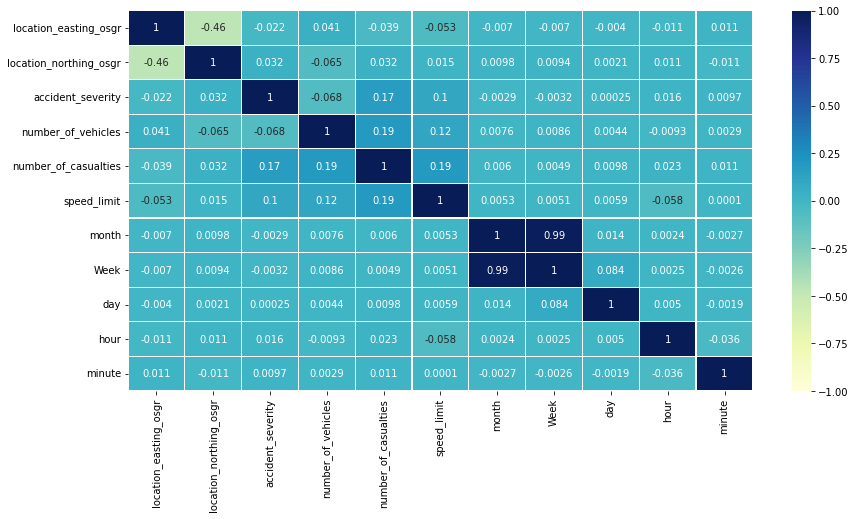

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(df_EDA.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

the histogeam of the numeric features shows some of the features like the date and its parts( month, week, day) are equally distributed. 

Some other features are norally distributed like time and its parts (hour, minute)

The rest of the features are skewed 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21ce005610>,
      dtype=object)

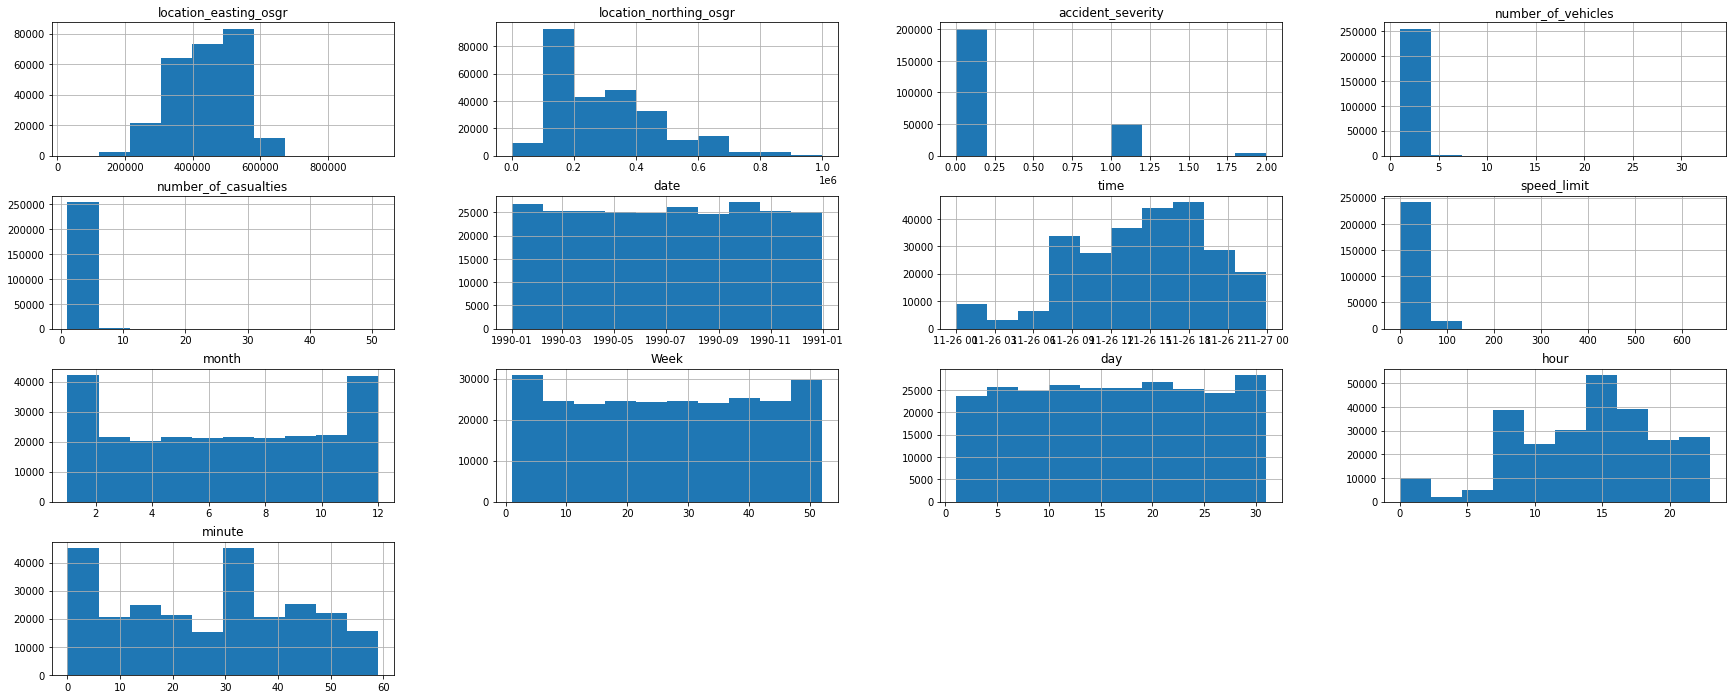

In [ ]:
df_EDA.hist(figsize=(30,12))

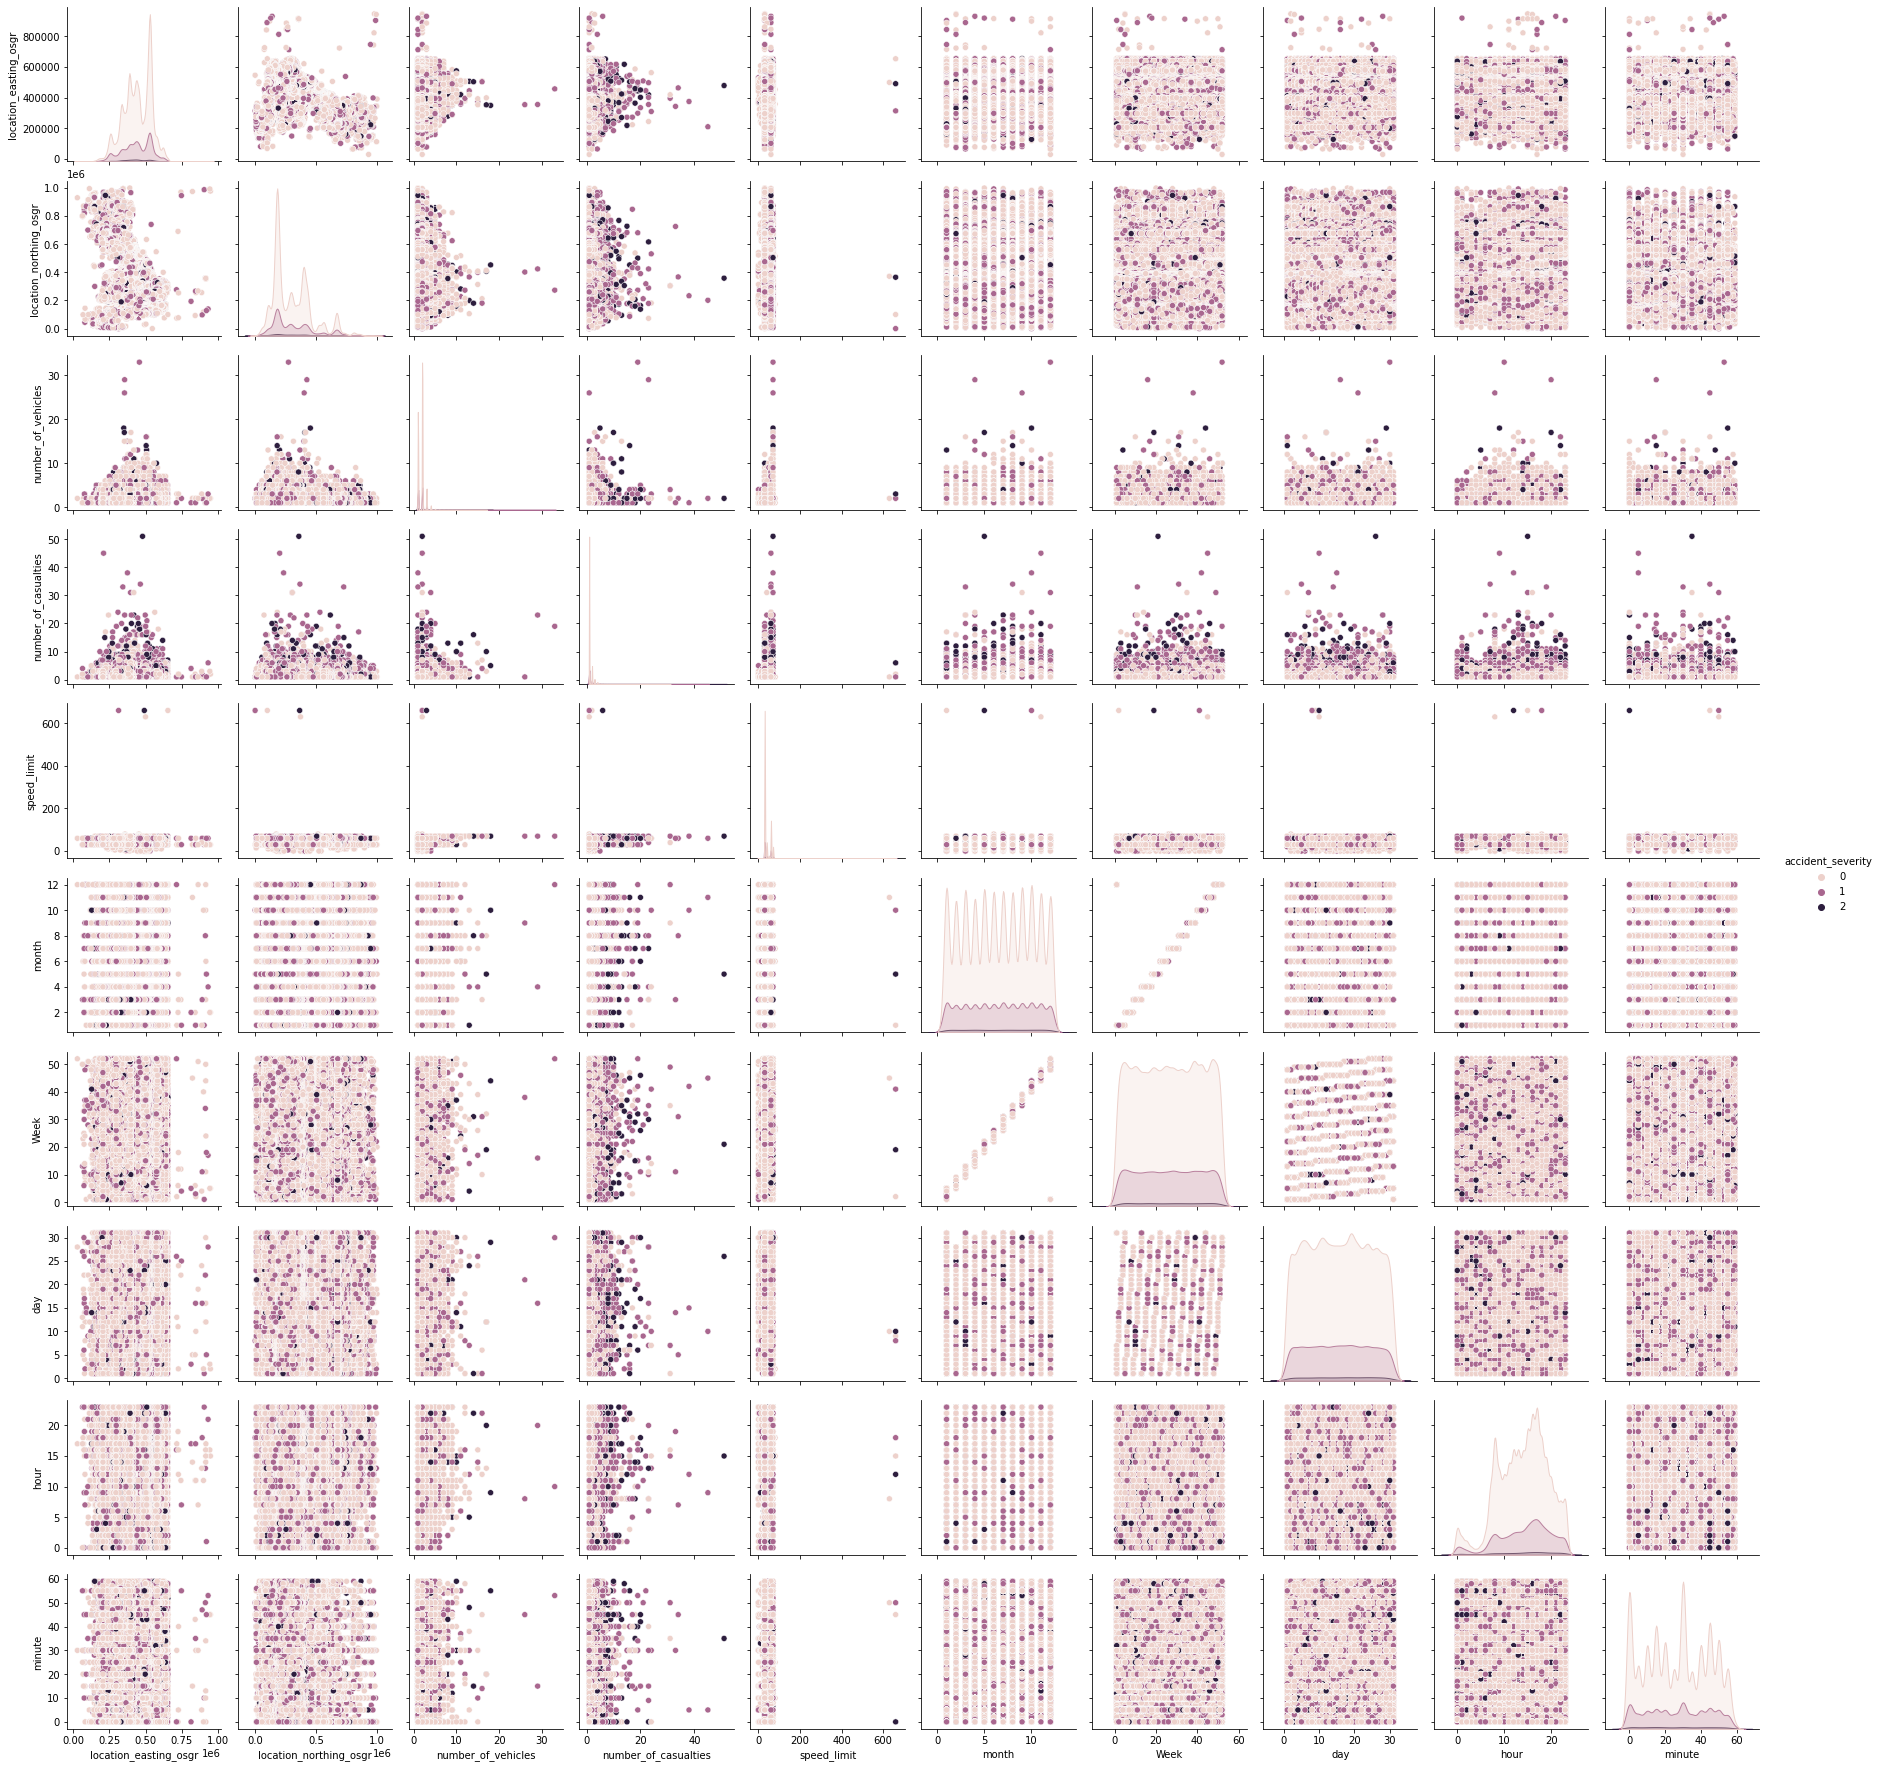

In [ ]:
#!!!! Don't run this cell again it takes 15 minutes
sns.pairplot(df_EDA, hue="accident_severity")

## Questions and Visualizations

### Question 1: what is the relation between the accident severity and the number of vehicles?

Answer: There's no significant correlation between accident severity classes and the average of the number of vehicles. All Accidents classes have an average of 1.7 cars in them approximately.

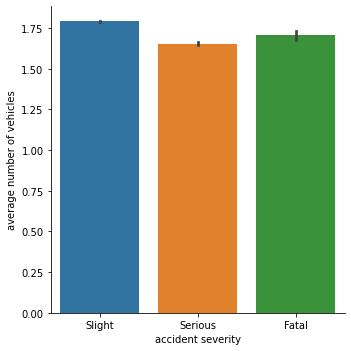

In [ ]:
df_EDA['accident_severity'] = df_EDA.accident_severity.map({0:'Slight', 1:'Serious', 2:'Fatal'})
chart = sns.catplot(data=df_EDA, x="accident_severity", y="number_of_vehicles", kind= 'bar')
plt.ylabel("average number of vehicles")
plt.xlabel("accident severity")
plt.show(chart)
df_EDA['accident_severity'] = df_EDA.accident_severity.map({'Slight':0, 'Serious':1, 'Fatal':2})

### Question 2: Does the number of casualties increase with the increase in accidents severity?

Answer: Yes, with the increase of accident severity, the average number of casualties increase. The casualties are approximately 1.25 in slight accidents, 1.5 in serious accidents and 2 in Fatal accidents

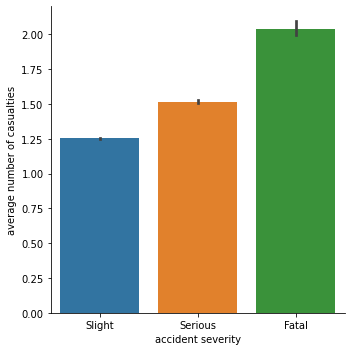

In [ ]:
df_EDA['accident_severity'] = df_EDA.accident_severity.map({0:'Slight', 1:'Serious', 2:'Fatal'})
chart = sns.catplot(x = 'accident_severity',\
            y = 'number_of_casualties',\
            data = df_EDA,
            kind = "bar")
plt.ylabel("average number of casualties")
plt.xlabel("accident severity")
plt.show(chart)
df_EDA['accident_severity'] = df_EDA.accident_severity.map({'Slight':0, 'Serious':1, 'Fatal':2})

### Question 3: What is the relation between the number of accidents and the hour of the day

Answer: accidents happen the most from 03:00 pm to 06:00 pm and around 08:00 am. That might be the case because these are rush hours when people are heading to work/school at the morning and returning home after work/school is finished. Accidents are scarce around 04:00 am. This might be the case becuase people might be sleeping at this time.

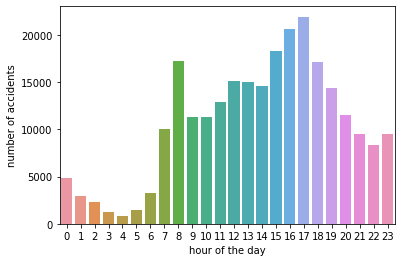

In [ ]:
chart = sns.countplot(x ='hour', data = df_EDA)
plt.xlabel("hour of the day")
plt.ylabel("number of accidents")
plt.show(chart)

### Question 4: What is the relation between the number of accidents and the day of the week?

Friday is the day with the most accidents and sunday is the day with the least accidents. This might be the case because Friday is the last working day and because Sunday is a part of the weekend. This doesn't explain however why Saturday has a high number of accidents although it's a weekend? Maybe people in UK like to go out and party on Saturdays: https://www.quora.com/Why-do-US-and-UK-people-go-out-party-on-Friday-and-not-on-Saturdays-like-the-rest-of-Europe

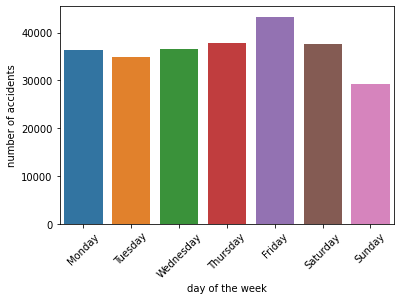

In [ ]:
chart = sns.countplot(x ='day_of_week', data = df_EDA,  order= ['Monday', "Tuesday", 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xticklabels(chart.get_xticklabels(),  rotation=45)
plt.xlabel("day of the week")
plt.ylabel("number of accidents")
plt.show(chart)

### Question 5: What is the relation between the number of accidents and the month?

Answer: accidents happen slightly more in January and october, but overall there doesn't seem to be a significant relation between the month and number of accidents.

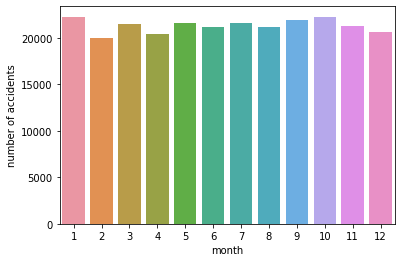

In [ ]:
chart = sns.countplot(x ='month', data = df_EDA)
plt.xlabel("month")
plt.ylabel("number of accidents")
plt.show(chart)

### Question 6: How are accidents distributed on the map?

The plot shows the distribution. We can see that the lots of Serious and Slight accidents happen at certain points especially around London

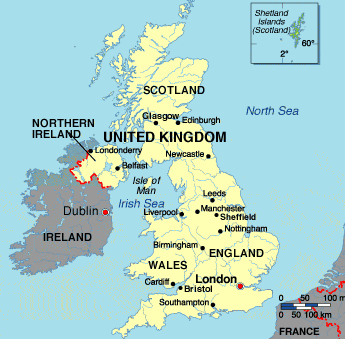

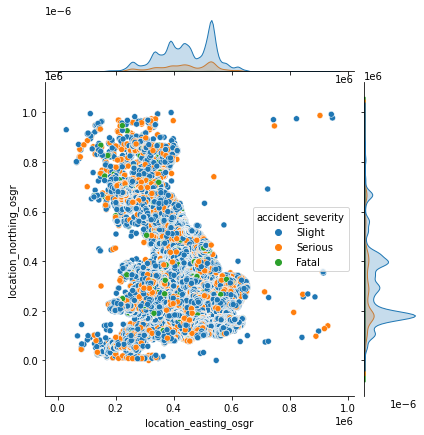

In [ ]:
df_EDA['accident_severity'] = df_EDA.accident_severity.map({0:'Slight', 1:'Serious', 2:'Fatal'})
sns.jointplot(data=df_EDA, x="location_easting_osgr", y="location_northing_osgr" ,hue = "accident_severity")
df_EDA['accident_severity'] = df_EDA.accident_severity.map({'Slight':0, 'Serious':1, 'Fatal':2})

### Question 7: what is the relation between accident weather, light and road conditions, and the number of accidents?

#### Question 7.1: what is the relation between weather condition and the number of accidents?


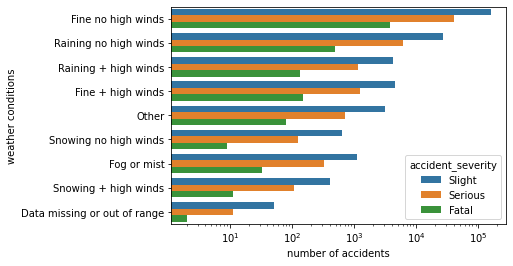

In [ ]:
df_EDA['accident_severity'] = df_EDA.accident_severity.map({0:'Slight', 1:'Serious', 2:'Fatal'})
chart = sns.countplot(y ='weather_conditions', data = df_EDA, hue= 'accident_severity' )
chart.set_yticklabels(chart.get_yticklabels())
chart.set_xscale('log')
plt.xlabel("number of accidents")
plt.ylabel("weather conditions")
plt.show(chart)
df_EDA['accident_severity'] = df_EDA.accident_severity.map({'Slight':0, 'Serious':1, 'Fatal':2})


#### Question 7.2: what is the relation between light conditions and the number of accidents?

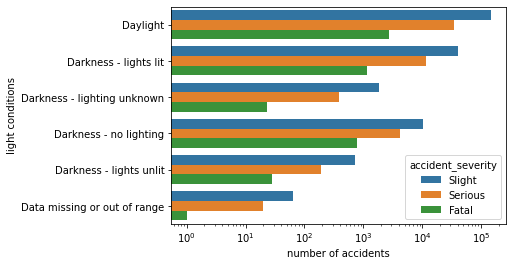

In [ ]:
df_EDA['accident_severity'] = df_EDA.accident_severity.map({0:'Slight', 1:'Serious', 2:'Fatal'})
chart = sns.countplot(y ='light_conditions', data = df_EDA , hue = 'accident_severity')
chart.set_yticklabels(chart.get_yticklabels())
chart.set_xscale('log')
plt.xlabel("number of accidents")
plt.ylabel("light conditions")
plt.show(chart)
df_EDA['accident_severity'] = df_EDA.accident_severity.map({'Slight':0, 'Serious':1, 'Fatal':2})

#### Question 7.3: what is the relation between road surface conditions and the number of accidents and their severity?

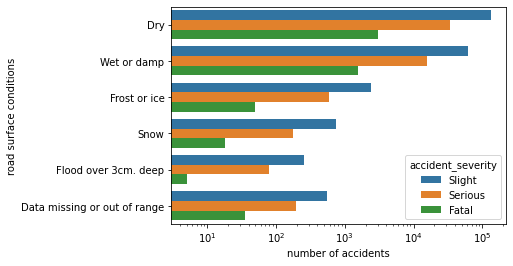

In [ ]:
df_EDA['accident_severity'] = df_EDA.accident_severity.map({0:'Slight', 1:'Serious', 2:'Fatal'})
chart = sns.countplot(y ='road_surface_conditions', data = df_EDA , hue='accident_severity')
chart.set_yticklabels(chart.get_yticklabels())
chart.set_xscale('log')
plt.xlabel("number of accidents")
plt.ylabel("road surface conditions")
plt.show(chart)
df_EDA['accident_severity'] = df_EDA.accident_severity.map({'Slight':0, 'Serious':1, 'Fatal':2})

#### Question 7.4: what is the relation between carriageway hazards and the number of accidents?

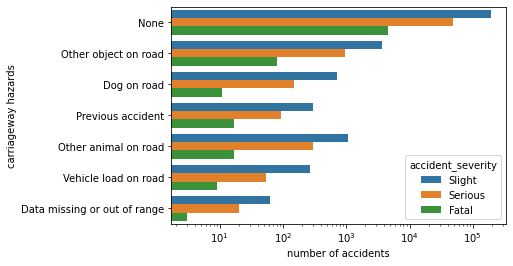

In [ ]:
df_EDA['accident_severity'] = df_EDA.accident_severity.map({0:'Slight', 1:'Serious', 2:'Fatal'})
chart = sns.countplot(y ='carriageway_hazards', data = df_EDA, hue= 'accident_severity' )
chart.set_yticklabels(chart.get_yticklabels())
chart.set_xscale('log')
plt.xlabel("number of accidents")
plt.ylabel("carriageway hazards")
plt.show(chart)
df_EDA['accident_severity'] = df_EDA.accident_severity.map({'Slight':0, 'Serious':1, 'Fatal':2})

# 3 - Cleaning Data

## Observing Missing and duplicate Data

### NaN Values
*Data missing with NaN Values*


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258441 entries, 199001AB00002 to 1990986016890
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                258441 non-null  int64  
 1   accident_reference                           258441 non-null  object 
 2   location_easting_osgr                        258316 non-null  float64
 3   location_northing_osgr                       258316 non-null  float64
 4   longitude                                    0 non-null       float64
 5   latitude                                     0 non-null       float64
 6   police_force                                 258441 non-null  object 
 7   accident_severity                            258441 non-null  object 
 8   number_of_vehicles                           258441 non-null  int64  
 9   number_of_casualties                         

In [ ]:
get_percentage(data)

accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.048367
location_northing_osgr                           0.048367
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.001161
day_of_week                                      0.000000
time                                             0.001161
local_authority_district                         0.000000
local_authority_ons_district                     0.000000
local_authority_highway                          0.000000
first_road_class                                 0.000000
first_road_num

#### MCAR missing

**location_easting_osgr and location_northing_osgr**

The values missing here don't have a systemic relationship with any other feature and the data itself doesn't explain why they're missing

**time**

The values missing here don't have a systemic relationship with any other feature and the data itself doesn't explain why they're missing


**road_type**

The values missing here don't have a systemic relationship with any other feature and the data itself doesn't explain why they're missing

**first_road_number**

The values missing here don't have a systemic relationship with any other feature and the data itself doesn't explain why they're missing

**weather_conditions**
The values missing here don't have a systemic relationship with any other feature and the data itself doesn't explain why they're missing

#### MAR

**Longitude and Latitude**

 are missing because another navigation system was used "BNG" that uses easting and northing values and their values can be obtained from the other features

**second_road_number**

can be infered from second road class when second raod class == -1
when not junction exists and there's only first road then second road doesn't exist so second road class --1 and its number is NaN

In [ ]:
data[data.second_road_class == '-1'].second_road_number.isna()
print("percentage of data where second road class =-1 and second road number = NaN: ",len(data[data.second_road_class == '-1'].second_road_number.isna())/ len(data)*100)

percentage of data where second road class =-1 and second road number = NaN:  39.933292318169336


### Non Nan Values

*Data missing but has Values of "Missing Data" in Cell*

In [ ]:
for (columnName,columnData) in data.iteritems():
  if data[columnName].dtypes == object:
    missing = data[data[columnName].str.contains("missing", na=False)]
    percentage = len(missing)/len(data)*100
    if percentage>0:
      print(columnName, data.shape, percentage)

road_type (258441, 35) 0.008125645698631409
junction_detail (258441, 35) 0.0011608065283759156
junction_control (258441, 35) 39.687201334153634
pedestrian_crossing_human_control (258441, 35) 0.04140209951207432
pedestrian_crossing_physical_facilities (258441, 35) 0.04140209951207432
light_conditions (258441, 35) 0.03482419585127747
weather_conditions (258441, 35) 0.02631161464318742
road_surface_conditions (258441, 35) 0.32076953734121133
special_conditions_at_site (258441, 35) 0.028633227699939253
carriageway_hazards (258441, 35) 0.03405032483236019
urban_or_rural_area (258441, 35) 100.0
did_police_officer_attend_scene_of_accident (258441, 35) 100.0
trunk_road_flag (258441, 35) 100.0


urban_or_rural_area, did_police_officer_attend_scene_of_accident,trunk_road_flag. All values in these columns are missing.

junction_control:MAR

Explanation: Some accindents happened in places where is no junction.

The Rest are MCAR as there is no pattern what explains why they are missing.

## Handling Missing data

In [ ]:
#before dropping
print(data.shape)
data


(258441, 35)


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,1990,01AB00002,527110.0,180180.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199001AB00004,1990,01AB00004,529520.0,179270.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199001AB00005,1990,01AB00005,529590.0,178290.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199001AB00006,1990,01AB00006,529960.0,178290.0,NaN,NaN,Metropolitan Police,Slight,3,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
199001AB00007,1990,01AB00007,529020.0,179130.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,1990,986015390,206600.0,560800.0,NaN,NaN,Dumfries and Galloway,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1990986016090,1990,986016090,206000.0,560700.0,NaN,NaN,Dumfries and Galloway,Serious,1,1,...,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1990986016390,1990,986016390,280500.0,560800.0,NaN,NaN,Dumfries and Galloway,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1


**Dropping columns with single values that are non NaN**

In [ ]:
#after dropping #1

columns_freq=data.describe(include = 'all')
columns_with_one_unique_value=[]
for (columnName, columnData) in columns_freq.iteritems():
  # print(columnName, columnData.values[1], columnData.values[6], columnData.values[10])
  if(columnData.values[1]==1):#with 1 unique value
    columns_with_one_unique_value.append(columnName)
  if(columnData.values[6]==columnData.values[10]):#min=max
    columns_with_one_unique_value.append(columnName)
# print(columns_with_one_unique_value)
data_clean=data.drop(columns_with_one_unique_value,axis=1)
print("dropped columns are", columns_with_one_unique_value)
print(data_clean.shape)
data_clean

dropped columns are ['accident_year', 'local_authority_ons_district', 'local_authority_highway', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']
(258441, 28)


,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,01AB00002,527110.0,180180.0,NaN,NaN,Metropolitan Police,Slight,2,1,04/01/1990,...,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00004,01AB00004,529520.0,179270.0,NaN,NaN,Metropolitan Police,Slight,2,1,03/01/1990,...,Auto traffic signal,B,323.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None
199001AB00005,01AB00005,529590.0,178290.0,NaN,NaN,Metropolitan Police,Slight,2,1,08/01/1990,...,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
199001AB00006,01AB00006,529960.0,178290.0,NaN,NaN,Metropolitan Police,Slight,3,1,05/01/1990,...,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00007,01AB00007,529020.0,179130.0,NaN,NaN,Metropolitan Police,Slight,2,1,10/01/1990,...,Give way or uncontrolled,A,202.0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,986015390,206600.0,560800.0,NaN,NaN,Dumfries and Galloway,Slight,2,1,14/11/1990,...,Give way or uncontrolled,A,77.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
1990986016090,986016090,206000.0,560700.0,NaN,NaN,Dumfries and Galloway,Serious,1,1,23/11/1990,...,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None
1990986016390,986016390,280500.0,560800.0,NaN,NaN,Dumfries and Galloway,Slight,2,1,11/12/1990,...,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None


**dropping columns with at least 50% of their values as NaN**

In [ ]:

columns_percentage=data.isnull().sum()/len(data)*100
columns_to_drop=[]
for i in range(len(columns_percentage)):
  if(columns_percentage[i]>50): 
    columns_to_drop.append(columns_percentage.index[i])
data_clean=data_clean.drop(columns_to_drop,axis=1)
print("dropped columns are", columns_to_drop)

print(data_clean.shape)
data_clean



dropped columns are ['longitude', 'latitude']
(258441, 26)


,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,01AB00002,527110.0,180180.0,Metropolitan Police,Slight,2,1,04/01/1990,Thursday,08:50,...,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00004,01AB00004,529520.0,179270.0,Metropolitan Police,Slight,2,1,03/01/1990,Wednesday,13:00,...,Auto traffic signal,B,323.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None
199001AB00005,01AB00005,529590.0,178290.0,Metropolitan Police,Slight,2,1,08/01/1990,Monday,21:05,...,Give way or uncontrolled,C,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
199001AB00006,01AB00006,529960.0,178290.0,Metropolitan Police,Slight,3,1,05/01/1990,Friday,16:00,...,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00007,01AB00007,529020.0,179130.0,Metropolitan Police,Slight,2,1,10/01/1990,Wednesday,10:25,...,Give way or uncontrolled,A,202.0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,986015390,206600.0,560800.0,Dumfries and Galloway,Slight,2,1,14/11/1990,Wednesday,08:05,...,Give way or uncontrolled,A,77.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
1990986016090,986016090,206000.0,560700.0,Dumfries and Galloway,Serious,1,1,23/11/1990,Friday,11:30,...,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None
1990986016390,986016390,280500.0,560800.0,Dumfries and Galloway,Slight,2,1,11/12/1990,Tuesday,08:50,...,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None


*dropping rows with NaN values of the MCAR data type*

In [ ]:
print('before dropping \n')
print(data_clean.shape)
get_percentage(data_clean)

before dropping 

(258441, 26)


accident_reference                          0.000000
location_easting_osgr                       0.048367
location_northing_osgr                      0.048367
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.001161
day_of_week                                 0.000000
time                                        0.001161
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.005417
road_type                                   0.378423
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                            0.000000
second_road_class                           0.000000
second_road_number                         39.

In [ ]:
columns_percentage_new=data_clean.isnull().sum()/len(data)*100
rows_to_drop=[]
for i in range(len(columns_percentage_new)):
  if(columns_percentage_new[i]<3): 
    rows_to_drop.append(columns_percentage_new.index[i])
data_clean=data_clean.dropna(subset=rows_to_drop)
print('after dropping \n')
print(data_clean.shape)
get_percentage(data_clean)

after dropping 

(255988, 26)


accident_reference                          0.000000
location_easting_osgr                       0.000000
location_northing_osgr                      0.000000
police_force                                0.000000
accident_severity                           0.000000
number_of_vehicles                          0.000000
number_of_casualties                        0.000000
date                                        0.000000
day_of_week                                 0.000000
time                                        0.000000
local_authority_district                    0.000000
first_road_class                            0.000000
first_road_number                           0.000000
road_type                                   0.000000
speed_limit                                 0.000000
junction_detail                             0.000000
junction_control                            0.000000
second_road_class                           0.000000
second_road_number                         39.

*Dealing with first_road_number*

In [ ]:
data_clean.first_road_number.value_counts()


first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     95770
1.0                                                                                                      2692
6.0                                                                                                      2675
4.0                                                                                                      2385
5.0                                                                                                      1609
                                                                                                        ...  
544.0                                                                                                       1
5384.0                                                                                                      1
6276.0                                                                                                      1
6281.0    

In [ ]:
data_clean.loc[data_clean.first_road_number == "first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ",'first_road_number']="0.0"
data_clean.first_road_number.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0.0       95770
1.0        2692
6.0        2675
4.0        2385
5.0        1609
          ...  
544.0         1
5384.0        1
6276.0        1
6281.0        1
893.0         1
Name: first_road_number, Length: 3489, dtype: int64

*Dealing with second_road_class by providing consistency through replacing -1 with Unavailable*

In [ ]:
data_clean.second_road_class.value_counts()

Unclassified    111693
-1              102173
A                19169
C                12608
B                 9130
Motorway          1102
A(M)               113
Name: second_road_class, dtype: int64

In [ ]:
data_clean.loc[data_clean.second_road_class == "-1",'second_road_class']="Unavailable"
data_clean.second_road_class.value_counts()

Unclassified    111693
Unavailable     102173
A                19169
C                12608
B                 9130
Motorway          1102
A(M)               113
Name: second_road_class, dtype: int64

*Dealing with second_road_number*

In [ ]:
data_clean['second_road_number'].value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     124301
4.0                                                                                                        419
1.0                                                                                                        381
6.0                                                                                                        271
40.0                                                                                                       259
                                                                                                         ...  
3177.0                                                                                                       1
3391.0                                                                                                       1
5090.0                                                                                                       1
5

In [ ]:
data_clean = data_clean.fillna(value= "Unavailable", axis = 0)
data_clean['second_road_number'].value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     124301
Unavailable                                                                                             102181
4.0                                                                                                        419
1.0                                                                                                        381
6.0                                                                                                        271
                                                                                                         ...  
3177.0                                                                                                       1
3391.0                                                                                                       1
5090.0                                                                                                       1
5

In [ ]:
data_clean.loc[data_clean.second_road_number == "first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ",'second_road_number']="0.0"
data_clean.second_road_number.value_counts()

0.0            124301
Unavailable    102181
4.0               419
1.0               381
6.0               271
                ...  
3177.0              1
3391.0              1
5090.0              1
536.0               1
709.0               1
Name: second_road_number, Length: 2896, dtype: int64

In [ ]:
data_clean.shape

(255988, 26)

In [ ]:
data_clean["accident_reference"].nunique()

255988

**Replacing Missing Data with Mode**

replacing Data missing or out of range of feature special_conditions_at_site with the mode of the same feature

why this technique? 
we used the mode to replace the missing values with the most frequent value in that feature

**Special case: Weather Conditions**

we thought about nominal inputation of weather condtition using the mode of the weather condition in specific seasons

In [ ]:
def season_of_date(date):
    date_form=pd.to_datetime(date)
    doy = date_form.dayofyear
    # "day of year" ranges for the northern hemisphere
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
    # winter = everything else
    if doy in spring:
      return 'spring'
    elif doy in summer:
      return 'summer'
    elif doy in fall:
      return 'fall'
    else:
      return 'winter'

we created the season feature to replacae the data missing or out of range value of Weather Conditions feature based on the mode of observations with the same season feature

In [ ]:
data_clean['Season'] = data_clean.date.map(season_of_date)

In [ ]:
print("before\n")
data_clean.weather_conditions.value_counts()

before



Fine no high winds              204370
Raining no high winds            33562
Fine + high winds                 5866
Raining + high winds              5523
Other                             3872
Fog or mist                       1442
Snowing no high winds              768
Snowing + high winds               521
Data missing or out of range        64
Name: weather_conditions, dtype: int64

In [ ]:
print("the most frequent weather condition at spring season on top \n")
data_clean[data_clean.Season == "spring"].weather_conditions.value_counts()

the most frequent weather condition at spring season on top 



Fine no high winds              54366
Raining no high winds            6524
Fine + high winds                1010
Raining + high winds              690
Other                             630
Fog or mist                       241
Snowing no high winds              63
Snowing + high winds               20
Data missing or out of range       13
Name: weather_conditions, dtype: int64

In [ ]:
print("the most frequent weather condition at summer season on top \n")
data_clean[data_clean.Season == "summer"].weather_conditions.value_counts()

the most frequent weather condition at summer season on top 



Fine no high winds              53824
Raining no high winds            7254
Raining + high winds              966
Fine + high winds                 861
Other                             634
Fog or mist                       232
Snowing no high winds             225
Snowing + high winds              199
Data missing or out of range        2
Name: weather_conditions, dtype: int64

In [ ]:
print("the most frequent weather condition at summer winter on top \n")
data_clean[data_clean.Season == "winter"].weather_conditions.value_counts()

the most frequent weather condition at summer winter on top 



Fine no high winds              45355
Raining no high winds            8886
Fine + high winds                2986
Raining + high winds             2978
Other                            1115
Snowing no high winds             368
Snowing + high winds              264
Fog or mist                       171
Data missing or out of range       42
Name: weather_conditions, dtype: int64

In [ ]:
print("the most frequent weather condition at fall season on top \n")
data_clean[data_clean.Season == "fall"].weather_conditions.value_counts()

the most frequent weather condition at fall season on top 



Fine no high winds              50825
Raining no high winds           10898
Other                            1493
Fine + high winds                1009
Raining + high winds              889
Fog or mist                       798
Snowing no high winds             112
Snowing + high winds               38
Data missing or out of range        7
Name: weather_conditions, dtype: int64

In [ ]:
mode = data_clean.weather_conditions.value_counts().index[0]
data_miss = 'Data missing or out of range'

In [ ]:
data_clean.loc[data_clean.weather_conditions == data_miss, 'weather_conditions'] = mode
data_clean.drop(columns = 'Season', axis =1)
data_clean.weather_conditions.value_counts()

Fine no high winds       204434
Raining no high winds     33562
Fine + high winds          5866
Raining + high winds       5523
Other                      3872
Fog or mist                1442
Snowing no high winds       768
Snowing + high winds        521
Name: weather_conditions, dtype: int64

In [ ]:
data_clean = data_clean.drop(columns={'Season'},axis=1)
data_clean

,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,01AB00002,527110.0,180180.0,Metropolitan Police,Slight,2,1,04/01/1990,Thursday,08:50,...,Give way or uncontrolled,Unclassified,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00004,01AB00004,529520.0,179270.0,Metropolitan Police,Slight,2,1,03/01/1990,Wednesday,13:00,...,Auto traffic signal,B,323.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None
199001AB00005,01AB00005,529590.0,178290.0,Metropolitan Police,Slight,2,1,08/01/1990,Monday,21:05,...,Give way or uncontrolled,C,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
199001AB00006,01AB00006,529960.0,178290.0,Metropolitan Police,Slight,3,1,05/01/1990,Friday,16:00,...,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00007,01AB00007,529020.0,179130.0,Metropolitan Police,Slight,2,1,10/01/1990,Wednesday,10:25,...,Give way or uncontrolled,A,202.0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,986015390,206600.0,560800.0,Dumfries and Galloway,Slight,2,1,14/11/1990,Wednesday,08:05,...,Give way or uncontrolled,A,77.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
1990986016090,986016090,206000.0,560700.0,Dumfries and Galloway,Serious,1,1,23/11/1990,Friday,11:30,...,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None
1990986016390,986016390,280500.0,560800.0,Dumfries and Galloway,Slight,2,1,11/12/1990,Tuesday,08:50,...,Data missing or out of range,Unavailable,Unavailable,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None


**Effect before replacing missing data.**

In [ ]:
for (columnName,columnData) in data_clean.iteritems():
  if data_clean[columnName].dtypes == object:
    counts = data_clean[columnName].value_counts()
    print(columnName)
    display(counts)

accident_reference


01AB00002    1
4200F1123    1
4200F1108    1
4200F1110    1
4200F1111    1
            ..
110DC2687    1
110DC2700    1
110DC2704    1
110DC2705    1
986016890    1
Name: accident_reference, Length: 255988, dtype: int64

police_force


Metropolitan Police      46168
Greater Manchester       12938
West Midlands             9406
Strathclyde               9214
West Yorkshire            8805
Thames Valley             8483
Hampshire                 7815
Essex                     7181
Merseyside                6707
Devon and Cornwall        6312
Kent                      6218
Lancashire                6067
Sussex                    6055
Staffordshire             5352
South Wales               5083
Northumbria               5081
Nottinghamshire           5066
West Mercia               4903
Avon and Somerset         4771
South Yorkshire           4724
Surrey                    4411
Humberside                4330
Cheshire                  4224
Lothian and Borders       3819
Cambridgeshire            3784
Leicestershire            3781
Derbyshire                3767
Norfolk                   3709
Hertfordshire             3585
North Yorkshire           3356
North Wales               2906
Northamptonshire          2739
Dorset  

accident_severity


Slight     200617
Serious     50650
Fatal        4721
Name: accident_severity, dtype: int64

date


21/12/1990    1094
07/12/1990    1034
26/10/1990    1028
18/10/1990    1006
29/09/1990    1005
              ... 
01/01/1990     441
29/12/1990     424
02/12/1990     423
26/12/1990     334
25/12/1990     304
Name: date, Length: 365, dtype: int64

day_of_week


Friday       43334
Thursday     37823
Saturday     37550
Wednesday    36660
Monday       36308
Tuesday      34981
Sunday       29332
Name: day_of_week, dtype: int64

time


17:00    2630
16:00    2544
17:30    2543
16:30    2496
15:30    2387
         ... 
04:51       1
05:37       1
03:31       1
04:09       1
05:21       1
Name: time, Length: 1437, dtype: int64

local_authority_district


Birmingham     3877
836            3284
Leeds          3131
Westminster    3013
Manchester     3013
               ... 
805              52
811              30
801              28
666               5
668               4
Name: local_authority_district, Length: 461, dtype: int64

first_road_class


A               120757
Unclassified     73764
B                32881
C                22006
Motorway          6205
A(M)               375
Name: first_road_class, dtype: int64

first_road_number


0.0       95770
1.0        2692
6.0        2675
4.0        2385
5.0        1609
          ...  
544.0         1
5384.0        1
6276.0        1
6281.0        1
893.0         1
Name: first_road_number, Length: 3489, dtype: int64

road_type


Single carriageway              203775
Dual carriageway                 33544
Roundabout                       11062
One way street/Slip road          7588
Data missing or out of range        19
Name: road_type, dtype: int64

junction_detail


Not at junction or within 20 metres    101446
T or staggered junction                 88112
Crossroads                              30433
Roundabout                              12746
Private drive or entrance               11011
Other junction                           4943
More than 4 arms (not roundabout)        3424
Slip road                                2668
Mini-roundabout                          1203
Data missing or out of range                2
Name: junction_detail, dtype: int64

junction_control


Give way or uncontrolled        130681
Data missing or out of range    101547
Auto traffic signal              20862
Stop sign                         2690
Authorised person                  208
Name: junction_control, dtype: int64

second_road_class


Unclassified    111693
Unavailable     102173
A                19169
C                12608
B                 9130
Motorway          1102
A(M)               113
Name: second_road_class, dtype: int64

second_road_number


0.0            124301
Unavailable    102181
4.0               419
1.0               381
6.0               271
                ...  
3177.0              1
3391.0              1
5090.0              1
536.0               1
709.0               1
Name: second_road_number, Length: 2896, dtype: int64

pedestrian_crossing_human_control


None within 50 metres                 254384
Control by school crossing patrol       1016
Control by other authorised person       486
Data missing or out of range             102
Name: pedestrian_crossing_human_control, dtype: int64

pedestrian_crossing_physical_facilities


No physical crossing facilities within 50 metres                             221282
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     12698
Zebra                                                                          9172
Pedestrian phase at traffic signal junction                                    8451
Central refuge                                                                 3047
Footbridge or subway                                                           1236
Data missing or out of range                                                    102
Name: pedestrian_crossing_physical_facilities, dtype: int64

light_conditions


Daylight                        183841
Darkness - lights lit            53644
Darkness - no lighting           15252
Darkness - lighting unknown       2234
Darkness - lights unlit            931
Data missing or out of range        86
Name: light_conditions, dtype: int64

weather_conditions


Fine no high winds       204434
Raining no high winds     33562
Fine + high winds          5866
Raining + high winds       5523
Other                      3872
Fog or mist                1442
Snowing no high winds       768
Snowing + high winds        521
Name: weather_conditions, dtype: int64

road_surface_conditions


Dry                             171051
Wet or damp                      79861
Frost or ice                      3013
Snow                               945
Data missing or out of range       777
Flood over 3cm. deep               341
Name: road_surface_conditions, dtype: int64

special_conditions_at_site


None                                          249770
Roadworks                                       3594
Road surface defective                          1404
Auto traffic signal - out                        502
Road sign or marking defective or obscured       421
Auto signal part defective                       225
Data missing or out of range                      72
Name: special_conditions_at_site, dtype: int64

carriageway_hazards


None                            248193
Other object on road              4714
Other animal on road              1389
Dog on road                        865
Previous accident                  412
Vehicle load on road               329
Data missing or out of range        86
Name: carriageway_hazards, dtype: int64

In [ ]:
for (columnName,columnData) in data_clean.iteritems():
  if data_clean[columnName].dtypes == np.object:
    data_clean[columnName] = data_clean[columnName].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
for (columnName,columnData) in data_clean.iteritems():
  if data_clean[columnName].dtypes == object:
    # display(data_clean.junction_control.value_counts())
    print(columnName, data_clean.shape)
    missing = data_clean[data_clean[columnName].str.contains("missing", na=False)]
    print(len(missing)/len(data_clean))
    if len(missing)/len(data_clean)<0.03:
      display(data_clean[columnName].str.contains("missing"))
      data_clean = data_clean[data_clean[columnName].str.contains("missing") == False]
    else:
      most_freq = data_clean[columnName].value_counts().index[0]
      data_clean.loc[data_clean[columnName].str.contains("missing"), columnName] = most_freq

accident_reference (255988, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: accident_reference, Length: 255988, dtype: bool

police_force (255988, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: police_force, Length: 255988, dtype: bool

accident_severity (255988, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: accident_severity, Length: 255988, dtype: bool

date (255988, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: date, Length: 255988, dtype: bool

day_of_week (255988, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: day_of_week, Length: 255988, dtype: bool

time (255988, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: time, Length: 255988, dtype: bool

local_authority_district (255988, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: local_authority_district, Length: 255988, dtype: bool

first_road_class (255988, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: first_road_class, Length: 255988, dtype: bool

first_road_number (255988, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: first_road_number, Length: 255988, dtype: bool

road_type (255988, 26)
7.422222916699221e-05


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: road_type, Length: 255988, dtype: bool

junction_detail (255969, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: junction_detail, Length: 255969, dtype: bool

junction_control (255969, 26)
0.3966886615176056
second_road_class (255969, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: second_road_class, Length: 255969, dtype: bool

second_road_number (255969, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: second_road_number, Length: 255969, dtype: bool

pedestrian_crossing_human_control (255969, 26)
0.00039457903105454174


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: pedestrian_crossing_human_control, Length: 255969, dtype: bool

pedestrian_crossing_physical_facilities (255868, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: pedestrian_crossing_physical_facilities, Length: 255868, dtype: bool

light_conditions (255868, 26)
0.0003282942767364422


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: light_conditions, Length: 255868, dtype: bool

weather_conditions (255784, 26)
0.0


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: weather_conditions, Length: 255784, dtype: bool

road_surface_conditions (255784, 26)
0.002627216714102524


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: road_surface_conditions, Length: 255784, dtype: bool

special_conditions_at_site (255112, 26)
3.527862272256891e-05


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: special_conditions_at_site, Length: 255112, dtype: bool

carriageway_hazards (255103, 26)
9.799963152138547e-05


accident_index
199001AB00002    False
199001AB00004    False
199001AB00005    False
199001AB00006    False
199001AB00007    False
                 ...  
1990986015390    False
1990986016090    False
1990986016390    False
1990986016490    False
1990986016890    False
Name: carriageway_hazards, Length: 255103, dtype: bool

**Effect after replacing missing data.**



In [ ]:
for (columnName,columnData) in data_clean.iteritems():
  if data_clean[columnName].dtypes == object:
    counts = data_clean[columnName].value_counts()
    print(columnName)
    display(counts)

accident_reference


01AB00002    1
4200G0134    1
4200G0121    1
4200G0122    1
4200G0123    1
            ..
110CG4400    1
110CG4411    1
110CG4414    1
110CG4417    1
986016890    1
Name: accident_reference, Length: 255078, dtype: int64

police_force


Metropolitan Police      46168
Greater Manchester       12938
West Midlands             9406
Strathclyde               9214
West Yorkshire            8805
Thames Valley             8415
Hampshire                 7815
Essex                     7181
Merseyside                6707
Devon and Cornwall        6312
Kent                      6218
Lancashire                6067
Sussex                    6055
Staffordshire             5352
South Wales               5083
Northumbria               5081
Nottinghamshire           5053
West Mercia               4903
Avon and Somerset         4771
South Yorkshire           4724
Surrey                    4409
Humberside                4239
Cheshire                  4224
Lothian and Borders       3819
Cambridgeshire            3784
Leicestershire            3781
Derbyshire                3767
Norfolk                   3709
Hertfordshire             3585
North Yorkshire           3356
North Wales               2905
Northamptonshire          2739
Dorset  

accident_severity


Slight     199969
Serious     50428
Fatal        4681
Name: accident_severity, dtype: int64

date


21/12/1990    1086
07/12/1990    1031
26/10/1990    1022
18/10/1990     998
29/09/1990     997
              ... 
01/01/1990     440
29/12/1990     423
02/12/1990     421
26/12/1990     333
25/12/1990     301
Name: date, Length: 365, dtype: int64

day_of_week


Friday       43197
Thursday     37677
Saturday     37395
Wednesday    36544
Monday       36192
Tuesday      34856
Sunday       29217
Name: day_of_week, dtype: int64

time


17:00    2627
16:00    2539
17:30    2537
16:30    2493
15:30    2383
         ... 
04:43       1
04:51       1
04:47       1
03:31       1
05:21       1
Name: time, Length: 1437, dtype: int64

local_authority_district


Birmingham     3877
836            3284
Leeds          3131
Westminster    3013
Manchester     3013
               ... 
807              63
803              62
805              52
811              30
801              28
Name: local_authority_district, Length: 459, dtype: int64

first_road_class


A               120287
Unclassified     73473
B                32756
C                21982
Motorway          6205
A(M)               375
Name: first_road_class, dtype: int64

first_road_number


0.0       95455
1.0        2678
6.0        2675
4.0        2385
5.0        1609
          ...  
1527.0        1
8056.0        1
890.0         1
1961.0        1
4907.0        1
Name: first_road_number, Length: 3488, dtype: int64

road_type


Single carriageway          202974
Dual carriageway             33480
Roundabout                   11048
One way street/Slip road      7576
Name: road_type, dtype: int64

junction_detail


Not at junction or within 20 metres    100699
T or staggered junction                 88035
Crossroads                              30408
Roundabout                              12735
Private drive or entrance               10990
Other junction                           4928
More than 4 arms (not roundabout)        3415
Slip road                                2668
Mini-roundabout                          1200
Name: junction_detail, dtype: int64

junction_control


Give way or uncontrolled    231366
Auto traffic signal          20818
Stop sign                     2688
Authorised person              206
Name: junction_control, dtype: int64

second_road_class


Unclassified    111565
Unavailable     101423
A                19161
C                12597
B                 9118
Motorway          1101
A(M)               113
Name: second_road_class, dtype: int64

second_road_number


0.0            124162
Unavailable    101430
4.0               419
1.0               381
6.0               271
                ...  
1048.0              1
1096.0              1
4431.0              1
5461.0              1
709.0               1
Name: second_road_number, Length: 2896, dtype: int64

pedestrian_crossing_human_control


None within 50 metres                 254002
Control by school crossing patrol        942
Control by other authorised person       134
Name: pedestrian_crossing_human_control, dtype: int64

pedestrian_crossing_physical_facilities


No physical crossing facilities within 50 metres                             220953
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     12660
Zebra                                                                          8809
Pedestrian phase at traffic signal junction                                    8386
Central refuge                                                                 3044
Footbridge or subway                                                           1226
Name: pedestrian_crossing_physical_facilities, dtype: int64

light_conditions


Daylight                       183121
Darkness - lights lit           53600
Darkness - no lighting          15224
Darkness - lighting unknown      2219
Darkness - lights unlit           914
Name: light_conditions, dtype: int64

weather_conditions


Fine no high winds       203882
Raining no high winds     33267
Fine + high winds          5818
Raining + high winds       5519
Other                      3864
Fog or mist                1440
Snowing no high winds       767
Snowing + high winds        521
Name: weather_conditions, dtype: int64

road_surface_conditions


Dry                     170977
Wet or damp              79805
Frost or ice              3010
Snow                       945
Flood over 3cm. deep       341
Name: road_surface_conditions, dtype: int64

special_conditions_at_site


None                                          248984
Roadworks                                       3592
Road surface defective                          1360
Auto traffic signal - out                        501
Road sign or marking defective or obscured       417
Auto signal part defective                       224
Name: special_conditions_at_site, dtype: int64

carriageway_hazards


None                    247447
Other object on road      4671
Other animal on road      1372
Dog on road                861
Previous accident          409
Vehicle load on road       318
Name: carriageway_hazards, dtype: int64

## Findings and conclusions

## Observing outliers

**Discovering Outliers in columns with IQR**

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255078 entries, 199001AB00002 to 1990986016890
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   accident_reference                       255078 non-null  object 
 1   location_easting_osgr                    255078 non-null  float64
 2   location_northing_osgr                   255078 non-null  float64
 3   police_force                             255078 non-null  object 
 4   accident_severity                        255078 non-null  object 
 5   number_of_vehicles                       255078 non-null  int64  
 6   number_of_casualties                     255078 non-null  int64  
 7   date                                     255078 non-null  object 
 8   day_of_week                              255078 non-null  object 
 9   time                                     255078 non-null  object 
 10  local_authority_di

In [ ]:
# univariant
data_description = data_clean.describe()
column_names_outliers = []
uppers = []
lowers = []
for (columnName, columnData) in data_description.iteritems():
  # if(columnName == "location_easting_osgr" or columnName == "location_northing_osgr" or columnName == "number_of_casualties"):
  #   continue
  min = data_clean[columnName].quantile(0)
  Q1 = data_clean[columnName].quantile(0.25)
  Q3 = data_clean[columnName].quantile(0.75)
  max = data_clean[columnName].quantile(1)
  IQR = Q3 - Q1
  cut_off = IQR * 1.5
  lower = Q1 - cut_off 
  if(lower < min):
    lower = min
  upper =  Q3 + cut_off
  if (upper >max):
    upper = max
  df1 = data_clean[data_clean[columnName]> upper]
  df2 = data_clean[data_clean[columnName]< lower]
  if(df1.shape[0]+ df2.shape[0]>2550):  #threshold 1%
    continue
  column_names_outliers.append(columnName)
  lowers.append(lower)
  uppers.append(upper) 
  print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
  print(columnName ," ", upper , " " , lower)
data_clean
# multivariant

Total number of outliers are 244
location_easting_osgr   749195.0   148995.0
Total number of outliers are 0
speed_limit   80.0   0.0


,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,01AB00002,527110.0,180180.0,Metropolitan Police,Slight,2,1,04/01/1990,Thursday,08:50,...,Give way or uncontrolled,Unclassified,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00004,01AB00004,529520.0,179270.0,Metropolitan Police,Slight,2,1,03/01/1990,Wednesday,13:00,...,Auto traffic signal,B,323.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None
199001AB00005,01AB00005,529590.0,178290.0,Metropolitan Police,Slight,2,1,08/01/1990,Monday,21:05,...,Give way or uncontrolled,C,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
199001AB00006,01AB00006,529960.0,178290.0,Metropolitan Police,Slight,3,1,05/01/1990,Friday,16:00,...,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00007,01AB00007,529020.0,179130.0,Metropolitan Police,Slight,2,1,10/01/1990,Wednesday,10:25,...,Give way or uncontrolled,A,202.0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,986015390,206600.0,560800.0,Dumfries and Galloway,Slight,2,1,14/11/1990,Wednesday,08:05,...,Give way or uncontrolled,A,77.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
1990986016090,986016090,206000.0,560700.0,Dumfries and Galloway,Serious,1,1,23/11/1990,Friday,11:30,...,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None
1990986016390,986016390,280500.0,560800.0,Dumfries and Galloway,Slight,2,1,11/12/1990,Tuesday,08:50,...,Give way or uncontrolled,Unavailable,Unavailable,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None


## Handling outliers

**Removing Outliers discoverd by IQR**

In [ ]:
# 255988
for index,column_name in enumerate(column_names_outliers):
  print(index ," ", column_name)
  data_clean = data_clean[data_clean[column_name]<=uppers[index]]
  data_clean = data_clean[data_clean[column_name]>=lowers[index]]
data_clean

0   location_easting_osgr
1   speed_limit


,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,01AB00002,527110.0,180180.0,Metropolitan Police,Slight,2,1,04/01/1990,Thursday,08:50,...,Give way or uncontrolled,Unclassified,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00004,01AB00004,529520.0,179270.0,Metropolitan Police,Slight,2,1,03/01/1990,Wednesday,13:00,...,Auto traffic signal,B,323.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None
199001AB00005,01AB00005,529590.0,178290.0,Metropolitan Police,Slight,2,1,08/01/1990,Monday,21:05,...,Give way or uncontrolled,C,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
199001AB00006,01AB00006,529960.0,178290.0,Metropolitan Police,Slight,3,1,05/01/1990,Friday,16:00,...,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00007,01AB00007,529020.0,179130.0,Metropolitan Police,Slight,2,1,10/01/1990,Wednesday,10:25,...,Give way or uncontrolled,A,202.0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,986015390,206600.0,560800.0,Dumfries and Galloway,Slight,2,1,14/11/1990,Wednesday,08:05,...,Give way or uncontrolled,A,77.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
1990986016090,986016090,206000.0,560700.0,Dumfries and Galloway,Serious,1,1,23/11/1990,Friday,11:30,...,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None
1990986016390,986016390,280500.0,560800.0,Dumfries and Galloway,Slight,2,1,11/12/1990,Tuesday,08:50,...,Give way or uncontrolled,Unavailable,Unavailable,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None


**Remove Outliers with Z-score** 

,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,01AB00002,527110.0,180180.0,Metropolitan Police,Slight,2,1,04/01/1990,Thursday,08:50,...,Give way or uncontrolled,Unclassified,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00004,01AB00004,529520.0,179270.0,Metropolitan Police,Slight,2,1,03/01/1990,Wednesday,13:00,...,Auto traffic signal,B,323.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None
199001AB00005,01AB00005,529590.0,178290.0,Metropolitan Police,Slight,2,1,08/01/1990,Monday,21:05,...,Give way or uncontrolled,C,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
199001AB00006,01AB00006,529960.0,178290.0,Metropolitan Police,Slight,3,1,05/01/1990,Friday,16:00,...,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00007,01AB00007,529020.0,179130.0,Metropolitan Police,Slight,2,1,10/01/1990,Wednesday,10:25,...,Give way or uncontrolled,A,202.0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,986015390,206600.0,560800.0,Dumfries and Galloway,Slight,2,1,14/11/1990,Wednesday,08:05,...,Give way or uncontrolled,A,77.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
1990986016090,986016090,206000.0,560700.0,Dumfries and Galloway,Serious,1,1,23/11/1990,Friday,11:30,...,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None
1990986016390,986016390,280500.0,560800.0,Dumfries and Galloway,Slight,2,1,11/12/1990,Tuesday,08:50,...,Give way or uncontrolled,Unavailable,Unavailable,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None


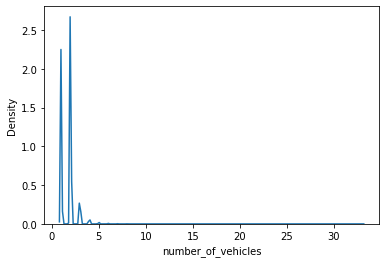

In [ ]:
# 255729
sns.kdeplot(data_clean["number_of_vehicles"])
z = np.abs(stats.zscore(data_clean['number_of_vehicles']))
z
filtered_entries = z < 5
filtered_entries
data_clean = data_clean[filtered_entries]
# print(data_clean.shape[0]-df_zscore_filter.shape[0])
data_clean

,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,01AB00002,527110.0,180180.0,Metropolitan Police,Slight,2,1,04/01/1990,Thursday,08:50,...,Give way or uncontrolled,Unclassified,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00004,01AB00004,529520.0,179270.0,Metropolitan Police,Slight,2,1,03/01/1990,Wednesday,13:00,...,Auto traffic signal,B,323.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None
199001AB00005,01AB00005,529590.0,178290.0,Metropolitan Police,Slight,2,1,08/01/1990,Monday,21:05,...,Give way or uncontrolled,C,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
199001AB00006,01AB00006,529960.0,178290.0,Metropolitan Police,Slight,3,1,05/01/1990,Friday,16:00,...,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00007,01AB00007,529020.0,179130.0,Metropolitan Police,Slight,2,1,10/01/1990,Wednesday,10:25,...,Give way or uncontrolled,A,202.0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,986015390,206600.0,560800.0,Dumfries and Galloway,Slight,2,1,14/11/1990,Wednesday,08:05,...,Give way or uncontrolled,A,77.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
1990986016090,986016090,206000.0,560700.0,Dumfries and Galloway,Serious,1,1,23/11/1990,Friday,11:30,...,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None
1990986016390,986016390,280500.0,560800.0,Dumfries and Galloway,Slight,2,1,11/12/1990,Tuesday,08:50,...,Give way or uncontrolled,Unavailable,Unavailable,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None


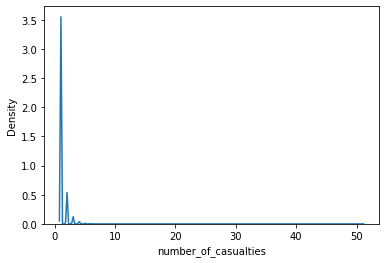

In [ ]:
sns.kdeplot(data_clean["number_of_casualties"])


z = np.abs(stats.zscore(data_clean['number_of_casualties']))
z
filtered_entries = z < 6
filtered_entries
data_clean = data_clean[filtered_entries]
data_clean

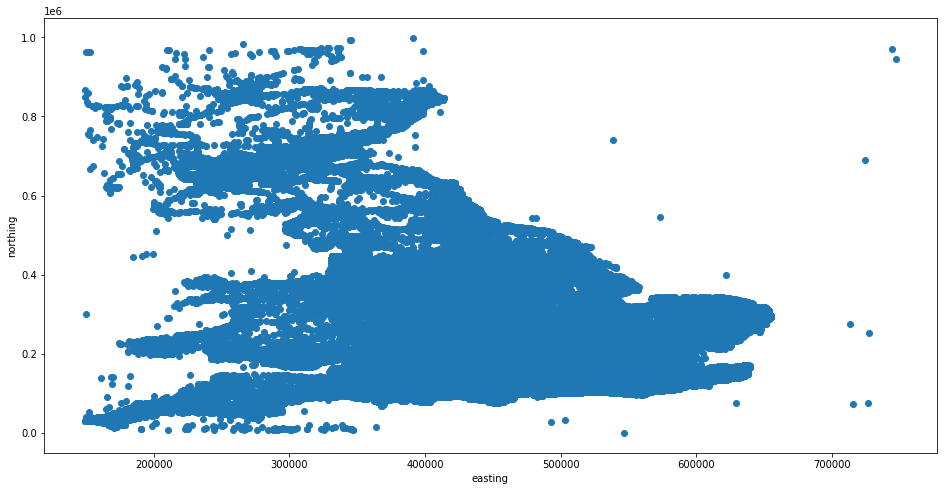

,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,01AB00002,527110.0,180180.0,Metropolitan Police,Slight,2,1,04/01/1990,Thursday,08:50,...,Give way or uncontrolled,Unclassified,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00004,01AB00004,529520.0,179270.0,Metropolitan Police,Slight,2,1,03/01/1990,Wednesday,13:00,...,Auto traffic signal,B,323.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None
199001AB00005,01AB00005,529590.0,178290.0,Metropolitan Police,Slight,2,1,08/01/1990,Monday,21:05,...,Give way or uncontrolled,C,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
199001AB00006,01AB00006,529960.0,178290.0,Metropolitan Police,Slight,3,1,05/01/1990,Friday,16:00,...,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00007,01AB00007,529020.0,179130.0,Metropolitan Police,Slight,2,1,10/01/1990,Wednesday,10:25,...,Give way or uncontrolled,A,202.0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,986015390,206600.0,560800.0,Dumfries and Galloway,Slight,2,1,14/11/1990,Wednesday,08:05,...,Give way or uncontrolled,A,77.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
1990986016090,986016090,206000.0,560700.0,Dumfries and Galloway,Serious,1,1,23/11/1990,Friday,11:30,...,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None
1990986016390,986016390,280500.0,560800.0,Dumfries and Galloway,Slight,2,1,11/12/1990,Tuesday,08:50,...,Give way or uncontrolled,Unavailable,Unavailable,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None


In [ ]:
# 254753 
# multivariate
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_clean['location_easting_osgr'], data_clean['location_northing_osgr'])
ax.set_xlabel('easting')
ax.set_ylabel('northing')
plt.show()
data_clean = data_clean[data_clean.location_easting_osgr<700000]
data_clean

# 4 - Data transformation

In [ ]:
data_clean

,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,01AB00002,527110.0,180180.0,Metropolitan Police,Slight,2,1,04/01/1990,Thursday,08:50,...,Give way or uncontrolled,Unclassified,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00004,01AB00004,529520.0,179270.0,Metropolitan Police,Slight,2,1,03/01/1990,Wednesday,13:00,...,Auto traffic signal,B,323.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None
199001AB00005,01AB00005,529590.0,178290.0,Metropolitan Police,Slight,2,1,08/01/1990,Monday,21:05,...,Give way or uncontrolled,C,0.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None
199001AB00006,01AB00006,529960.0,178290.0,Metropolitan Police,Slight,3,1,05/01/1990,Friday,16:00,...,Auto traffic signal,A,3212.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
199001AB00007,01AB00007,529020.0,179130.0,Metropolitan Police,Slight,2,1,10/01/1990,Wednesday,10:25,...,Give way or uncontrolled,A,202.0,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Dry,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,986015390,206600.0,560800.0,Dumfries and Galloway,Slight,2,1,14/11/1990,Wednesday,08:05,...,Give way or uncontrolled,A,77.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
1990986016090,986016090,206000.0,560700.0,Dumfries and Galloway,Serious,1,1,23/11/1990,Friday,11:30,...,Give way or uncontrolled,B,737.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Raining + high winds,Wet or damp,None,None
1990986016390,986016390,280500.0,560800.0,Dumfries and Galloway,Slight,2,1,11/12/1990,Tuesday,08:50,...,Give way or uncontrolled,Unavailable,Unavailable,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None


dropping features that consists of only unique values since it's not useful for analysis

In [ ]:

for (columnName, columnData) in data_clean.iteritems():
  if(data_clean[columnName].count() == data_clean[columnName].nunique()):
    columns_to_drop.append(columnName)

print(columns_to_drop)

['accident_reference', 'accident_reference', 'accident_reference', 'accident_reference', 'accident_reference', 'accident_reference']


In [ ]:

df_tr = data_clean.drop(columns= columns_to_drop, axis=1)
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253855 entries, 199001AB00002 to 1990986016890
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   location_easting_osgr                    253855 non-null  float64
 1   location_northing_osgr                   253855 non-null  float64
 2   police_force                             253855 non-null  object 
 3   accident_severity                        253855 non-null  object 
 4   number_of_vehicles                       253855 non-null  int64  
 5   number_of_casualties                     253855 non-null  int64  
 6   date                                     253855 non-null  object 
 7   day_of_week                              253855 non-null  object 
 8   time                                     253855 non-null  object 
 9   local_authority_district                 253855 non-null  object 
 10  first_road_class  

## 4.1 - Discretization

Discretizing location_easting_osgr and location_northing_osgr

In [ ]:
feature_count_pre = df_tr.shape[1]
print("number of features orignially:",feature_count_pre)
display(df_tr[['location_easting_osgr', 'location_northing_osgr']])

#first converting the features datatypes
df_tr.location_easting_osgr = df_tr.location_easting_osgr.astype(np.float64)
df_tr.location_northing_osgr = df_tr.location_northing_osgr.astype(np.float64)

#binning
df_tr.location_easting_osgr = pd.cut(df_tr.location_easting_osgr, bins=10, include_lowest = True, right=True, precision=0)
df_tr.location_northing_osgr = pd.cut(df_tr.location_northing_osgr, bins=10, include_lowest = True, right=True, precision=0)
print("number of features added:", df_tr.shape[1] - feature_count_pre)
print("number of unique values of location_easting_osgr after binning:",df_tr.location_easting_osgr.nunique())
print("number of unique values of location_northing_osgr after binning:",df_tr.location_northing_osgr.nunique())
display(df_tr[['location_easting_osgr', 'location_northing_osgr']])


number of features orignially: 25


,location_easting_osgr,location_northing_osgr
accident_index,,
199001AB00002,527110.0,180180.0
199001AB00004,529520.0,179270.0
199001AB00005,529590.0,178290.0
199001AB00006,529960.0,178290.0
199001AB00007,529020.0,179130.0
...,...,...
1990986015390,206600.0,560800.0
1990986016090,206000.0,560700.0
1990986016390,280500.0,560800.0


number of features added: 0
number of unique values of location_easting_osgr after binning: 10
number of unique values of location_northing_osgr after binning: 10


,location_easting_osgr,location_northing_osgr
accident_index,,
199001AB00002,"(503352.0, 553968.0]","(99945.0, 199840.0]"
199001AB00004,"(503352.0, 553968.0]","(99945.0, 199840.0]"
199001AB00005,"(503352.0, 553968.0]","(99945.0, 199840.0]"
199001AB00006,"(503352.0, 553968.0]","(99945.0, 199840.0]"
199001AB00007,"(503352.0, 553968.0]","(99945.0, 199840.0]"
...,...,...
1990986015390,"(199656.0, 250272.0]","(499525.0, 599420.0]"
1990986016090,"(199656.0, 250272.0]","(499525.0, 599420.0]"
1990986016390,"(250272.0, 300888.0]","(499525.0, 599420.0]"


Discretizing date into weeks

In [ ]:
df_tr['date'] = pd.to_datetime(df_tr["date"])
feature_count_pre = df_tr.shape[1]
print("before adding")


#added feature
df_tr['Week number'] = df_tr['date'].dt.isocalendar().week
print("number of features added:", df_tr.shape[1] - feature_count_pre)
#no features dropped
print("number of features dropped:", 0)
print("new feature is:\n")
display(df_tr[['date', 'Week number']])
lookup_table_date = df_tr[['date', 'Week number']]

before adding
number of features added: 1
number of features dropped: 0
new feature is:



,date,Week number
accident_index,,
199001AB00002,1990-04-01,13
199001AB00004,1990-03-01,9
199001AB00005,1990-08-01,31
199001AB00006,1990-05-01,18
199001AB00007,1990-10-01,40
...,...,...
1990986015390,1990-11-14,46
1990986016090,1990-11-23,47
1990986016390,1990-11-12,46


## 4.11 - Findings and conclusions

## 4.2 - Encoding
**features to encode**

one-hot \<=50 category per feature:
   
1.   first_road_class, 6,
2.   road_type, 4,
3.   junction_detail, 9,
4.   junction_control, 9, 
5.   second_road_class, 7, 
6.   pedestrian_crossing_human_control, 4, 
7.   pedestrian_crossing_physical_facilities, 6, 
8.   light_conditions, 5, 
9.   weather_conditions, 8, 
10.  road_surface_conditions, 5,
11.  special_conditions_at_site, 6, 
12.  carriageway_hazards, 6, 

label encoding for features with >50 category per feature:
1.   police_force, 51, 
2.   local_authority_district, 461,
3.   first_road_number, 3492, 
4.   second_road_number, 2902,

label encoding because it's an ordinal feature:
1.   accident_severity, 3, ordinal encoding

--------------------------------
features to be encoded after creation:

1.   map_area
2.   season, one-hot
--------------------------------
Why we use one-hot encoding on these features? 
- one-hot encoding is useful in features with a limited number of categories so as not to create tremendous amount of new features

Why we use ordinal encoding in accident_severity feature?
- accident severity has a natural ranking from slight(0) -> Fatal(2)

Why we use one-hot encoding with most frequent on some features? 
- to limit the number of new sparse features created

one-hot encoding

In [ ]:
features_to_one_hot_encode=[]
for (columnName, columnData) in df_tr.select_dtypes(include=[object]).iteritems():
  if(df_tr[columnName].nunique() <=50):
    features_to_one_hot_encode.append(columnName)
exclude= ['accident_severity']
features_to_one_hot_encode = list(set(features_to_one_hot_encode) - set(exclude))
features_to_one_hot_encode

['junction_control',
 'weather_conditions',
 'carriageway_hazards',
 'day_of_week',
 'second_road_class',
 'light_conditions',
 'special_conditions_at_site',
 'pedestrian_crossing_human_control',
 'junction_detail',
 'road_surface_conditions',
 'pedestrian_crossing_physical_facilities',
 'road_type',
 'first_road_class']

In [ ]:
# features_to_one_hot_encode = [
#     'first_road_class',
#     'road_type',
#     'junction_detail',
#     'junction_control',
#     'second_road_class',
#     'pedestrian_crossing_human_control', 
#     'pedestrian_crossing_physical_facilities',
#     'light_conditions',
#     'weather_conditions',
#     'road_surface_conditions',
#     'special_conditions_at_site',
#     'carriageway_hazards',
#                        ]
feature_count_pre = df_tr.shape[1]
print("number of features orignially:",feature_count_pre)
display(df_tr[features_to_one_hot_encode])
df_encoded= pd.get_dummies(df_tr[features_to_one_hot_encode], drop_first = True)
df_tr = pd.concat((df_tr,df_encoded), axis =1)
print("number of features added:", df_tr.shape[1] - feature_count_pre)
feature_count_pre = df_tr.shape[1]
df_tr = df_tr.drop(axis =1, columns=features_to_one_hot_encode)
print("number of features dropped:", -(df_tr.shape[1] - feature_count_pre))
df_tr.head()

number of features orignially: 26


,junction_control,weather_conditions,carriageway_hazards,day_of_week,second_road_class,light_conditions,special_conditions_at_site,pedestrian_crossing_human_control,junction_detail,road_surface_conditions,pedestrian_crossing_physical_facilities,road_type,first_road_class
accident_index,,,,,,,,,,,,,
199001AB00002,Give way or uncontrolled,Fine no high winds,None,Thursday,Unclassified,Daylight,None,None within 50 metres,T or staggered junction,Dry,No physical crossing facilities within 50 metres,Single carriageway,Unclassified
199001AB00004,Auto traffic signal,Fine no high winds,None,Wednesday,B,Daylight,None,None within 50 metres,Crossroads,Dry,Pedestrian phase at traffic signal junction,Single carriageway,A
199001AB00005,Give way or uncontrolled,Fine no high winds,None,Monday,C,Darkness - lights lit,None,None within 50 metres,Crossroads,Dry,No physical crossing facilities within 50 metres,Single carriageway,B
199001AB00006,Auto traffic signal,Fine no high winds,None,Friday,A,Daylight,None,None within 50 metres,Crossroads,Dry,No physical crossing facilities within 50 metres,Dual carriageway,A
199001AB00007,Give way or uncontrolled,Fine no high winds,None,Wednesday,A,Daylight,None,None within 50 metres,T or staggered junction,Dry,"Pelican, puffin, toucan or similar non-junctio...",One way street/Slip road,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990986015390,Give way or uncontrolled,Fine no high winds,None,Wednesday,A,Daylight,None,None within 50 metres,T or staggered junction,Wet or damp,No physical crossing facilities within 50 metres,Single carriageway,B
1990986016090,Give way or uncontrolled,Raining + high winds,None,Friday,B,Daylight,None,None within 50 metres,More than 4 arms (not roundabout),Wet or damp,No physical crossing facilities within 50 metres,One way street/Slip road,A
1990986016390,Give way or uncontrolled,Fine no high winds,None,Tuesday,Unavailable,Daylight,None,None within 50 metres,Not at junction or within 20 metres,Wet or damp,No physical crossing facilities within 50 metres,Single carriageway,A


number of features added: 63
number of features dropped: 13


,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,time,local_authority_district,first_road_number,...,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified
accident_index,,,,,,,,,,,,,,,,,,,,,
199001AB00002,"(503352.0, 553968.0]","(99945.0, 199840.0]",Metropolitan Police,Slight,2,1,1990-04-01,08:50,Westminster,0.0,...,0,0,0,0,1,0,0,0,0,1
199001AB00004,"(503352.0, 553968.0]","(99945.0, 199840.0]",Metropolitan Police,Slight,2,1,1990-03-01,13:00,Westminster,302.0,...,0,0,0,0,1,0,0,0,0,0
199001AB00005,"(503352.0, 553968.0]","(99945.0, 199840.0]",Metropolitan Police,Slight,2,1,1990-08-01,21:05,Westminster,310.0,...,0,0,0,0,1,0,1,0,0,0
199001AB00006,"(503352.0, 553968.0]","(99945.0, 199840.0]",Metropolitan Police,Slight,3,1,1990-05-01,16:00,Westminster,202.0,...,0,0,0,0,0,0,0,0,0,0
199001AB00007,"(503352.0, 553968.0]","(99945.0, 199840.0]",Metropolitan Police,Slight,2,1,1990-10-01,10:25,Westminster,202.0,...,1,0,1,0,0,0,0,0,0,0


one-hot encoding with the most frequent classes

In [ ]:
#this method does one hot encoding for features based on percentage/number of the classes in the feature and drops the original feature
def one_hot_top_n_percent_feature(df, feature, is_percent,limit_percent_with_max = False,  input_percent= 50, input_number=1):
  feature_count_pre = df.shape[1]
  # percent_covered = 0
  features_covered_n = input_number
  top_n_counts = df[feature].value_counts().sort_values(ascending=False).head(features_covered_n)
  percent_covered = top_n_counts.values.sum()*100/ df.shape[0]
  # print(features_covered_n, top_n_counts, percent_covered)
  if(top_n_counts.values.sum()<input_number):
    features_covered_n = top_n_counts
    top_n_counts = df[feature].value_counts().sort_values(ascending=False).head(features_covered_n)
    percent_covered = top_n_counts.values.sum()*100/ df.shape[0]
  else:
    while(percent_covered<input_percent):
      top_n_counts = df[feature].value_counts().sort_values(ascending=False).head(features_covered_n)
      percent_covered = top_n_counts.values.sum()*100/ df.shape[0]
      features_covered_n+=1
      if(limit_percent_with_max and features_covered_n == input_number):
        break
 
    
  top_n_counts = df[feature].value_counts().sort_values(ascending=False).head(features_covered_n)
  top_n_labels = [x for x in top_n_counts.index]
  for label in top_n_labels:
    df[feature +"_"+ str(label)] = np.where(df[feature]==label,1,0)
    # df[[feature]+top_10_labels]
  print("number of features added:", df.shape[1] - feature_count_pre)
  print("percentage: ", top_n_counts.values.sum()*100/ df.shape[0], "%")
  del df[feature]

def one_hot_top_n_percent_features(df, features, percent_to_cover, number_to_cover, is_percent = False, limit_percent_with_max= False):
  print("number of features orignially:", df.shape[1])
  for feature in features:
    one_hot_top_n_percent_feature(df, feature, is_percent= is_percent, limit_percent_with_max= limit_percent_with_max, input_percent=percent_to_cover, input_number=number_to_cover)
  print("number of features dropped:", len(features))

if 50 classes of the feature cover at least 80% of the observations then when use these classes, otherwise we increase the number of classes till they cover 80%

In [ ]:
features_to_label_encode=[]
for (columnName, columnData) in df_tr.select_dtypes(include=[object]).iteritems():
  if(df_tr[columnName].nunique() >50):
    features_to_label_encode.append(columnName)
exclude= ['time']
features_to_label_encode = list(set(features_to_label_encode) - set(exclude))
features_to_label_encode

['police_force',
 'local_authority_district',
 'first_road_number',
 'second_road_number']

In [ ]:

features_count=[]
for columnName in features_to_label_encode:
  features_count.append(df_tr[columnName].value_counts())
features_count

[Metropolitan Police      46106
 Greater Manchester       12882
 West Midlands             9370
 Strathclyde               9153
 West Yorkshire            8780
 Thames Valley             8369
 Hampshire                 7772
 Essex                     7153
 Merseyside                6685
 Kent                      6197
 Devon and Cornwall        6170
 Lancashire                6034
 Sussex                    6031
 Staffordshire             5325
 South Wales               5066
 Northumbria               5058
 Nottinghamshire           5034
 West Mercia               4875
 Avon and Somerset         4760
 South Yorkshire           4708
 Surrey                    4384
 Humberside                4229
 Cheshire                  4197
 Lothian and Borders       3804
 Cambridgeshire            3767
 Leicestershire            3766
 Derbyshire                3747
 Norfolk                   3692
 Hertfordshire             3543
 North Yorkshire           3330
 North Wales               2899
 Northam

In [ ]:
df_copy_tr=df_tr.copy()
def number_encode_features(df):
    result = df.copy() # take a copy of the dataframe
    for column in result.columns:
        if result.dtypes[column] == np.object: # if attribute is categorical
            # Apply LabelEncoder method to attribute
            # fit will infer the number of numerical values needed by counting the number of categories
            # then transform will replace each category with its numerical counterpart
            result[column] = preprocessing.LabelEncoder().fit_transform(result[column])
            df_tr[column]=result[column]
    return result
# features_to_label_encode=['police_force', 'local_authority_district', 'first_road_number','second_road_number']
print("Before Encoding \n")
display(df_tr[features_to_label_encode])
number_encode_features(df_tr[features_to_label_encode])
print("After Encoding \n")
display(df_tr[features_to_label_encode])


Before Encoding 



,police_force,local_authority_district,first_road_number,second_road_number
accident_index,,,,
199001AB00002,Metropolitan Police,Westminster,0.0,0.0
199001AB00004,Metropolitan Police,Westminster,302.0,323.0
199001AB00005,Metropolitan Police,Westminster,310.0,0.0
199001AB00006,Metropolitan Police,Westminster,202.0,3212.0
199001AB00007,Metropolitan Police,Westminster,202.0,202.0
...,...,...,...,...
1990986015390,Dumfries and Galloway,856,737.0,77.0
1990986016090,Dumfries and Galloway,856,718.0,737.0
1990986016390,Dumfries and Galloway,856,75.0,Unavailable


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


After Encoding 



,police_force,local_authority_district,first_road_number,second_road_number
accident_index,,,,
199001AB00002,29,443,0,0
199001AB00004,29,443,879,940
199001AB00005,29,443,965,0
199001AB00006,29,443,562,928
199001AB00007,29,443,562,483
...,...,...,...,...
1990986015390,11,110,3065,2652
1990986016090,11,110,3044,2618
1990986016390,11,110,3080,2886


**mapping the encoded values to its original values**

In [ ]:
mapping_dict={}
for i in range (len(features_count)):
  res = {features_count[i].index[j]: df_tr[features_to_label_encode[i]].value_counts().index[j] for j in range(len(features_count[i]))}
  mapping_dict[features_to_label_encode[i]]=res
mapping_dict



{'police_force': {'Metropolitan Police': 29,
  'Greater Manchester': 18,
  'West Midlands': 48,
  'Strathclyde': 40,
  'West Yorkshire': 49,
  'Thames Valley': 45,
  'Hampshire': 20,
  'Essex': 14,
  'Merseyside': 28,
  'Kent': 23,
  'Devon and Cornwall': 9,
  'Lancashire': 24,
  'Sussex': 43,
  'Staffordshire': 39,
  'South Wales': 37,
  'Northumbria': 35,
  'Nottinghamshire': 36,
  'West Mercia': 47,
  'Avon and Somerset': 0,
  'South Yorkshire': 38,
  'Surrey': 42,
  'Humberside': 22,
  'Cheshire': 4,
  'Lothian and Borders': 27,
  'Cambridgeshire': 2,
  'Leicestershire': 25,
  'Derbyshire': 8,
  'Norfolk': 30,
  'Hertfordshire': 21,
  'North Yorkshire': 32,
  'North Wales': 31,
  'Northamptonshire': 33,
  'Dorset': 10,
  'Suffolk': 41,
  'Warwickshire': 46,
  'Wiltshire': 50,
  'Bedfordshire': 1,
  'Cleveland': 6,
  'Cumbria': 7,
  'Gloucestershire': 16,
  'Dyfed-Powys': 13,
  'Grampian': 17,
  'Durham': 12,
  'Lincolnshire': 26,
  'Gwent': 19,
  'Tayside': 44,
  'Fife': 15,
  'Cen

In [ ]:
# It is not advised to one hot encode features with large number of categories
# features_to_one_hot_most_freq_encode = ['police_force', 'local_authority_district', 'first_road_number','second_road_number']
# one_hot_top_n_percent_features(df = df_tr,
#                                features= features_to_one_hot_most_freq_encode,
#                                percent_to_cover= 80,
#                                number_to_cover= 50,
#                                is_percent=True,
#                                limit_percent_with_max= True)
# df_tr.head()

label encoding for ordinal features

In [ ]:
feature_count_pre = df_tr.shape[1]
print("number of features orignially:",feature_count_pre)

features_to_label_encode = ['accident_severity']
display(df_tr[features_to_label_encode])
mapping_schema = [{'Slight':0, 'Serious':1, 'Fatal':2}]

for i,col in enumerate(features_to_label_encode):
  # display(df_tr[col].value_counts())
  df_tr[col] = df_tr[col].map(mapping_schema[i])

feature_count_pre = df_tr.shape[1]

print("number of features added:", df_tr.shape[1] - feature_count_pre)
print("number of features dropped:", 0)
display(df_tr[features_to_label_encode])


number of features orignially: 76


,accident_severity
accident_index,
199001AB00002,Slight
199001AB00004,Slight
199001AB00005,Slight
199001AB00006,Slight
199001AB00007,Slight
...,...
1990986015390,Slight
1990986016090,Serious
1990986016390,Slight


number of features added: 0
number of features dropped: 0


,accident_severity
accident_index,
199001AB00002,0
199001AB00004,0
199001AB00005,0
199001AB00006,0
199001AB00007,0
...,...
1990986015390,0
1990986016090,1
1990986016390,0


## 4.3 - Normalisation 

Normalisation is making the data features follow a normal distribution. Since the goal of the Data engineering is unknown, we choose not to normalize. There's no current reason to use normalization, since the data is not, for example, fed to a model that uses normalized data

### Standardization

Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. We use standardization to combat this effect

we Standardize based on the value of std of the features, and we chose the threshhold to be an arbitrary value 20 since using threshold =10 standardized columns with small ranges like speed_limit and minutes. it doesn't make since to standardize the location features besides we're using them anyway in creating a new feature so we left them out.

we normalize all the numerical features in the data set. why? to prevent making the feature scale affect the analysis model when the scales of features are very different and apart

In [ ]:
# for column in df_tr:
features_to_standardize=[]
Exceptions = ['location_easting_osgr', 'location_northing_osgr']
for column in df_tr.select_dtypes(include=[np.number]):
  std = df_tr[column].std()
  if(std>40):
    features_to_standardize.append(column)
features_to_standardize = set(features_to_standardize) - set(Exceptions)
print(list(features_to_standardize))
for feature in features_to_standardize:
  df_tr[feature] = (df_tr[feature] - df_tr[feature].mean()) / (df_tr[feature].std())





['first_road_number', 'local_authority_district', 'second_road_number']


In [ ]:
df_tr[features_to_standardize]

,first_road_number,local_authority_district,second_road_number
accident_index,,,
199001AB00002,-0.912410,1.582352,-0.938965
199001AB00004,-0.077305,1.582352,-0.255461
199001AB00005,0.004401,1.582352,-0.938965
199001AB00006,-0.378475,1.582352,-0.264187
199001AB00007,-0.378475,1.582352,-0.587760
...,...,...,...
1990986015390,1.999534,-1.145675,0.989389
1990986016090,1.979582,-1.145675,0.964666
1990986016390,2.013784,-1.145675,1.159538


## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

area column

In [ ]:
#adding the area feature
df_tr["area"] = df_tr.location_northing_osgr.astype(str) +"_"+ df_tr.location_easting_osgr.astype(str)

feature_count_pre = df_tr.shape[1]


print("number of unique values of the area feature:",df_tr.area.nunique())

#we drop the the location_easting_osgr and location_northing_osgr
df_tr = df_tr.drop(axis =1, columns=['location_easting_osgr', 'location_northing_osgr'])
print("number of features dropped:", -(df_tr.shape[1] - feature_count_pre))
print("new features are: \n")
df_tr[['area']].head()

number of unique values of the area feature: 79
number of features dropped: 2
new features are: 



,area
accident_index,
199001AB00002,"(99945.0, 199840.0]_(503352.0, 553968.0]"
199001AB00004,"(99945.0, 199840.0]_(503352.0, 553968.0]"
199001AB00005,"(99945.0, 199840.0]_(503352.0, 553968.0]"
199001AB00006,"(99945.0, 199840.0]_(503352.0, 553968.0]"
199001AB00007,"(99945.0, 199840.0]_(503352.0, 553968.0]"


adding features season, month, day, hour and minutes
note: ideally these added features should be processed but we leave them as is due to the order of the notebook operations

In [ ]:
def season_of_date(date):
    doy = date.dayofyear
    # "day of year" ranges for the northern hemisphere
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
    # winter = everything else
    if doy in spring:
      return 'spring'
    elif doy in summer:
      return 'summer'
    elif doy in fall:
      return 'fall'
    else:
      return 'winter'

In [ ]:
feature_count_pre = df_tr.shape[1]
print("number of features orignially:",feature_count_pre)

#adding featured
df_tr['month'] = df_tr['date'].dt.month
df_tr['day_of_month'] = df_tr['date'].dt.day
df_tr['hour'] = pd.to_datetime(df_tr['time'], format='%H:%M').dt.hour
df_tr['minute'] = pd.to_datetime(df_tr['time'], format='%H:%M').dt.minute
df_tr['season'] = df_tr['date'].map(season_of_date)
print("number of features added:", df_tr.shape[1] - feature_count_pre)
feature_count_pre = df_tr.shape[1]

#dropping features
df_tr = df_tr.drop(axis =1, columns=['date', 'time'])
print("number of features dropped:", -(df_tr.shape[1] - feature_count_pre))
print("new features are: \n")
df_tr[['season', 'month','day_of_month', 'hour', 'minute']].head()

number of features orignially: 75
number of features added: 5
number of features dropped: 2
new features are: 



,season,month,day_of_month,hour,minute
accident_index,,,,,
199001AB00002,spring,4,1,8,50
199001AB00004,winter,3,1,13,0
199001AB00005,summer,8,1,21,5
199001AB00006,spring,5,1,16,0
199001AB00007,fall,10,1,10,25


## 4.41 - Findings and concluisons

## 4.5 - Csv file for lookup

In [ ]:
additional_mapping=[['first_road_number','first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',"0.0"],
 ['second_road_class','-1','Unavailable'],
 ['second_road_number','first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ','0.0'],
 ['accident_severity','Slight','0'],
 ['accident_severity','Serious','1'],
 ['accident_severity','Fatal','2'],]

In [ ]:
csv_file = "lookup_tables.csv"
try:
    with open(csv_file, 'w') as csvfile:
        date =  datetime(1990, 1, 1)
        writer = csv.writer(csvfile)
        writer.writerow(["column_name","old_value","new_value"])
        for i in range(0,52):
          date_string = date.strftime('%m/%d/%Y')
          row_data = ["date",date_string,i+1]
          date =  date + timedelta(days=7)
          writer.writerow(row_data)
        for key in mapping_dict:
          for key2 in mapping_dict[key]:
            row_data = [key,key2,mapping_dict[key][key2]]
            writer.writerow(row_data)
        for row in additional_mapping:
          writer.writerow(row)
except IOError:
    print("I/O error")

## 5- Exporting the dataframe to a csv file or parquet

In [ ]:
df_tr.to_csv('1990_Accidents_UK_processed.csv', index=False)


In [ ]:
df_tr.to_parquet('1990_Accidents_UK.parquet_processed.gzip',compression='gzip', index= False) 